In [29]:
import numpy as np  # imports libraries for later use in the program
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [30]:
mpl.rcParams["font.size"] = 16  # changes the plot font size to 16
mpl.rcParams["font.family"] = "serif"  # changes the font family to serif
mpl.rcParams["font.serif"] = [
    "cmr10"
]  # changes the font to Computer Modern Roman (dependent on the font family)
mpl.rcParams[
    "mathtext.fontset"
] = "cm"  # changes the mathtype font to Computer Modern Roman
mpl.rcParams["figure.figsize"] = [
    16,
    9,
]  # changes the figure dimensions to [width, height]
mpl.rcParams["figure.dpi"] = 240  # changes the figure dpi to [value]

In [31]:
df = pd.read_table(
    "C:\\Users\\Simon\\Downloads\\totalkishdata.dat", sep=";"
)  # loads in the data from a local source
magdata = list(df["mag/arcsec^2"])  # picks the data in the [name] column

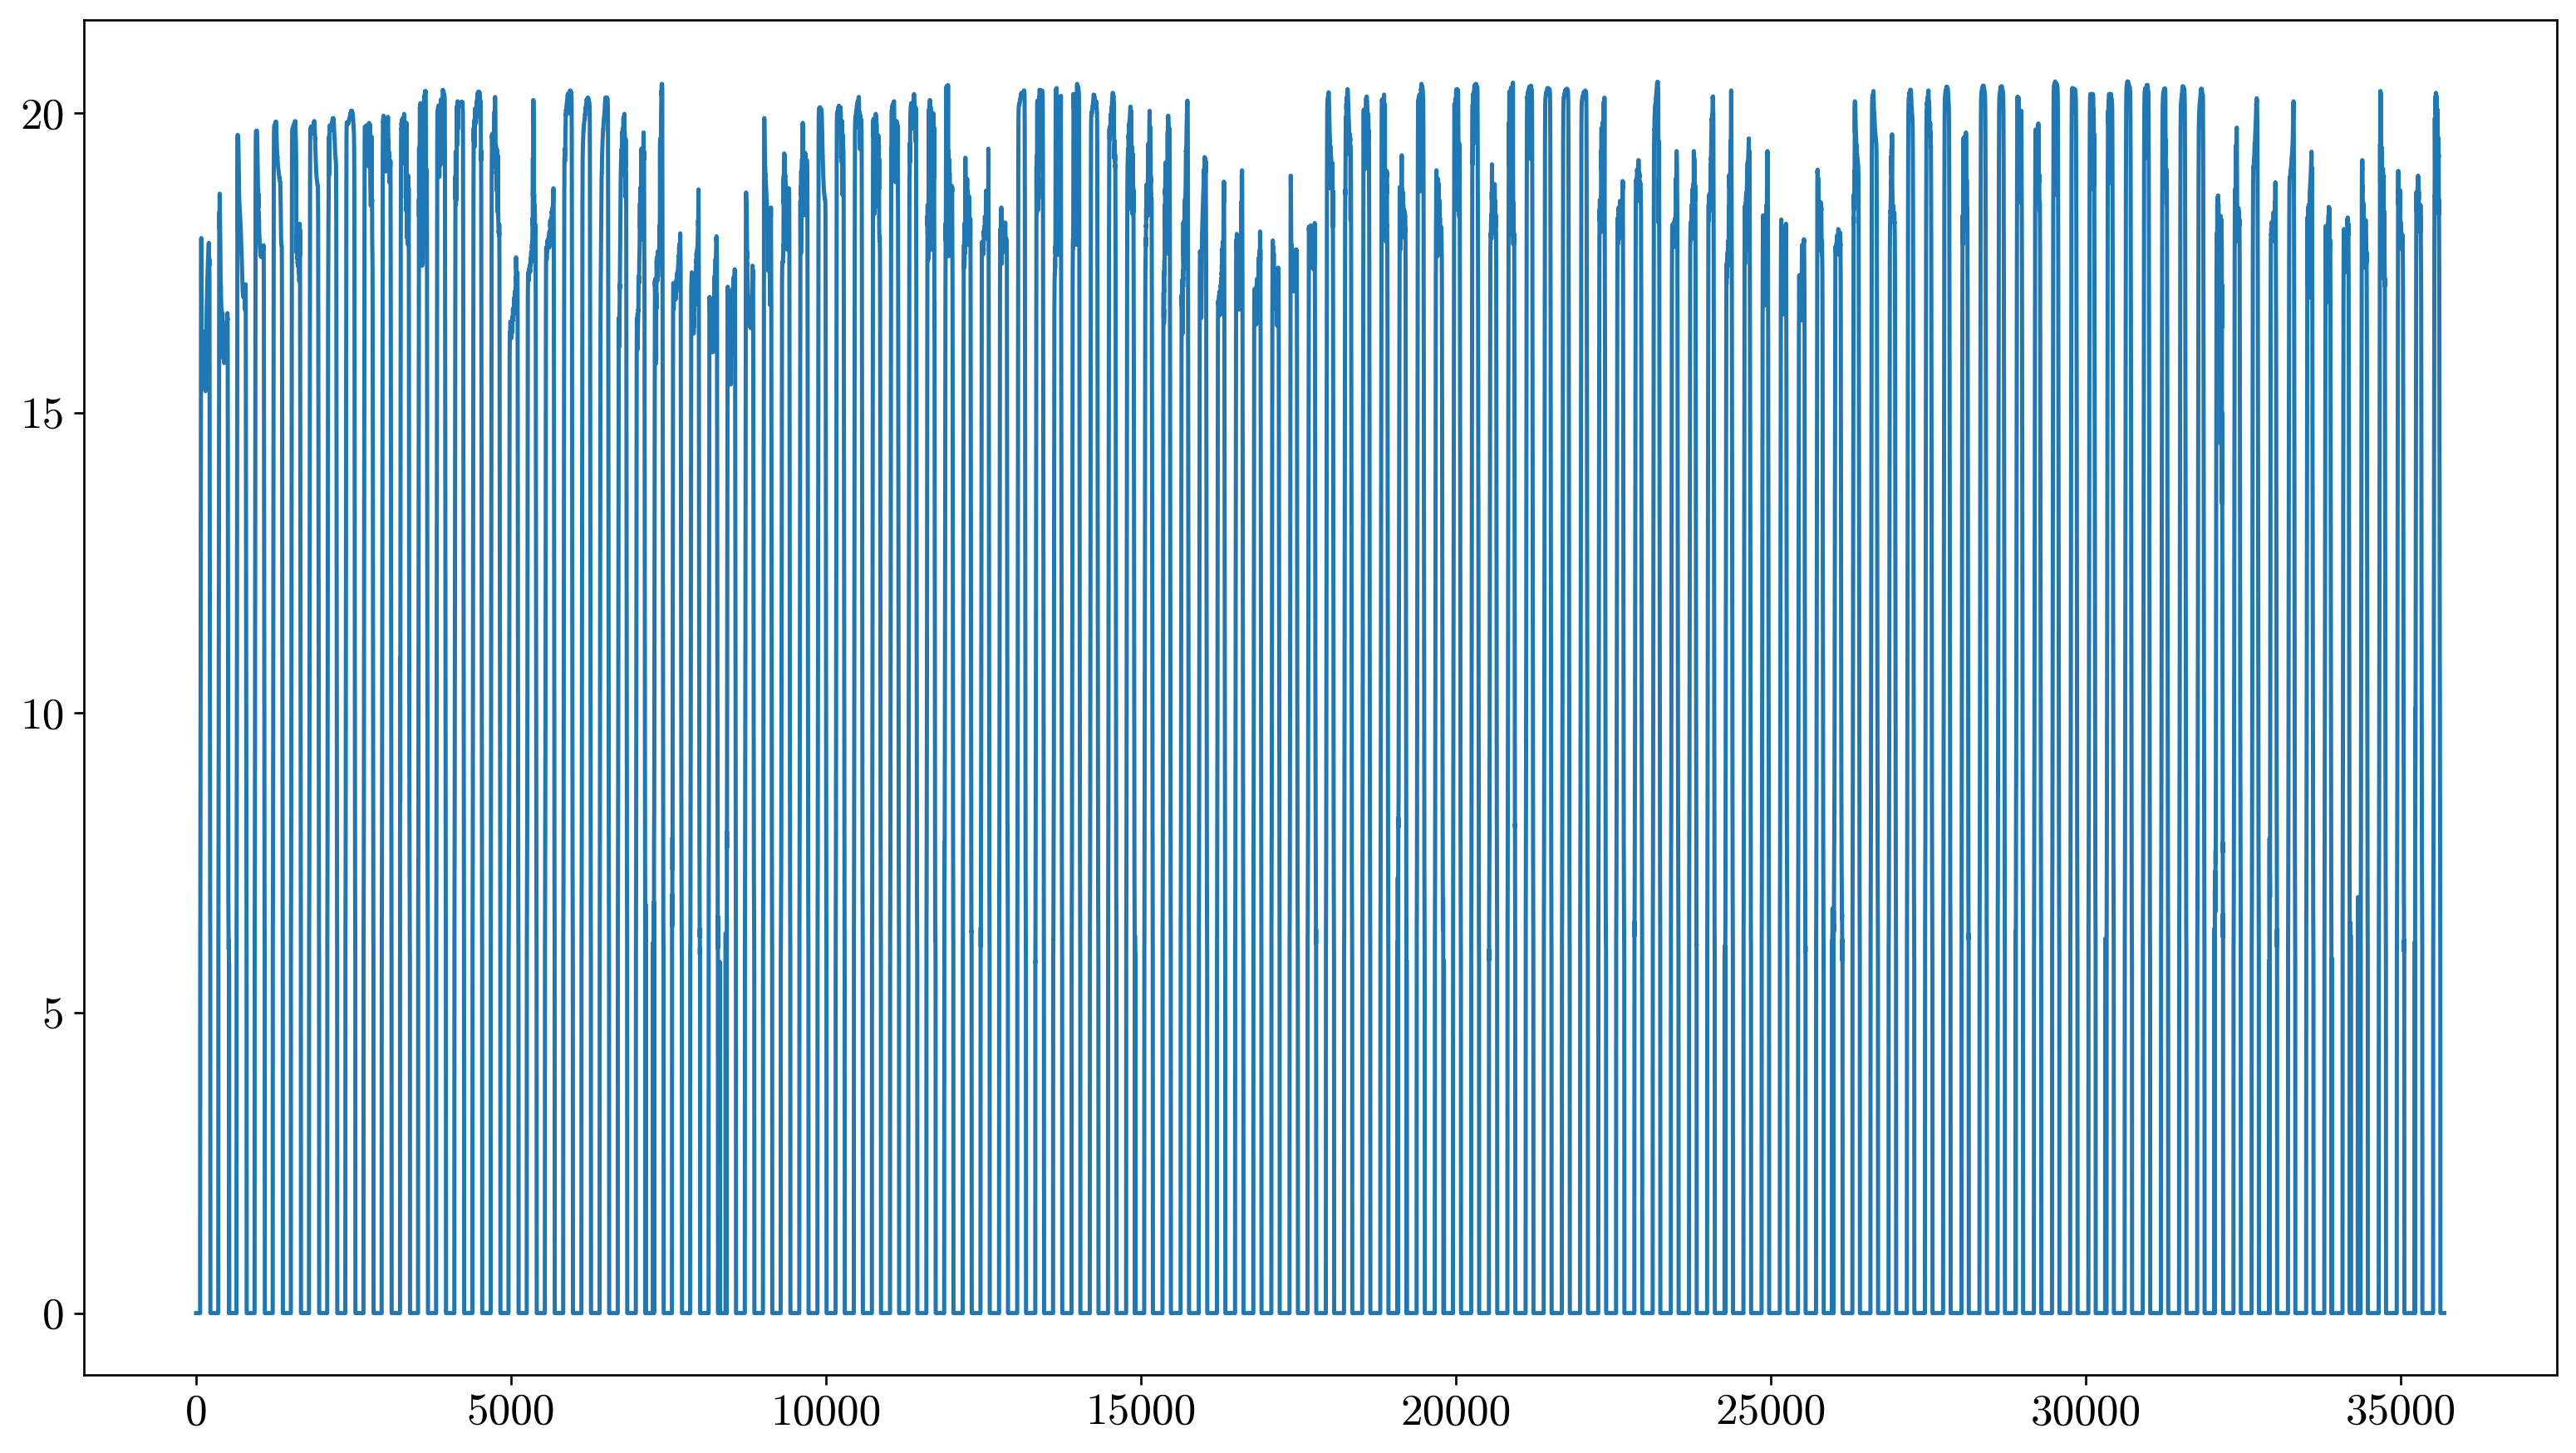

In [235]:
fig = plt.figure()  # sets up a figure
ax = plt.subplot()  # sets up a subplot
plt.plot(np.linspace(1, len(magdata), len(magdata)), magdata)
plt.show()  # creates a sequential raw plot of all the data
fig.savefig(
    "RawData", dpi=240, facecolor=fig.get_facecolor()
)  # uncomment line to save the image

In [33]:
magsbyday = (
    []
)  # creates an list that will be filled with lists of each day's worth of data
magtemp = (
    []
)  # creates a temporary list to be appended onto the previous list sequentially
counter = 0  # institutes a counter to control for when to indicate that the day has changed
for i in range(len(magdata)):  # loops over the entire length of the data
    magtemp.append(
        magdata[i]
    )  # appends each data point into the temporary temporary list
    counter = counter + 1  # counts up by one for each point
    if (
        counter == 288
    ):  # checks if the counter has reached 288 (288 five-minute intervals in a day)
        counter = 0  # resets the counter
        magsbyday.append(
            magtemp
        )  # appends the temporary list to the permanent list (a list of lists)
        magtemp = []  # resets the temporary list

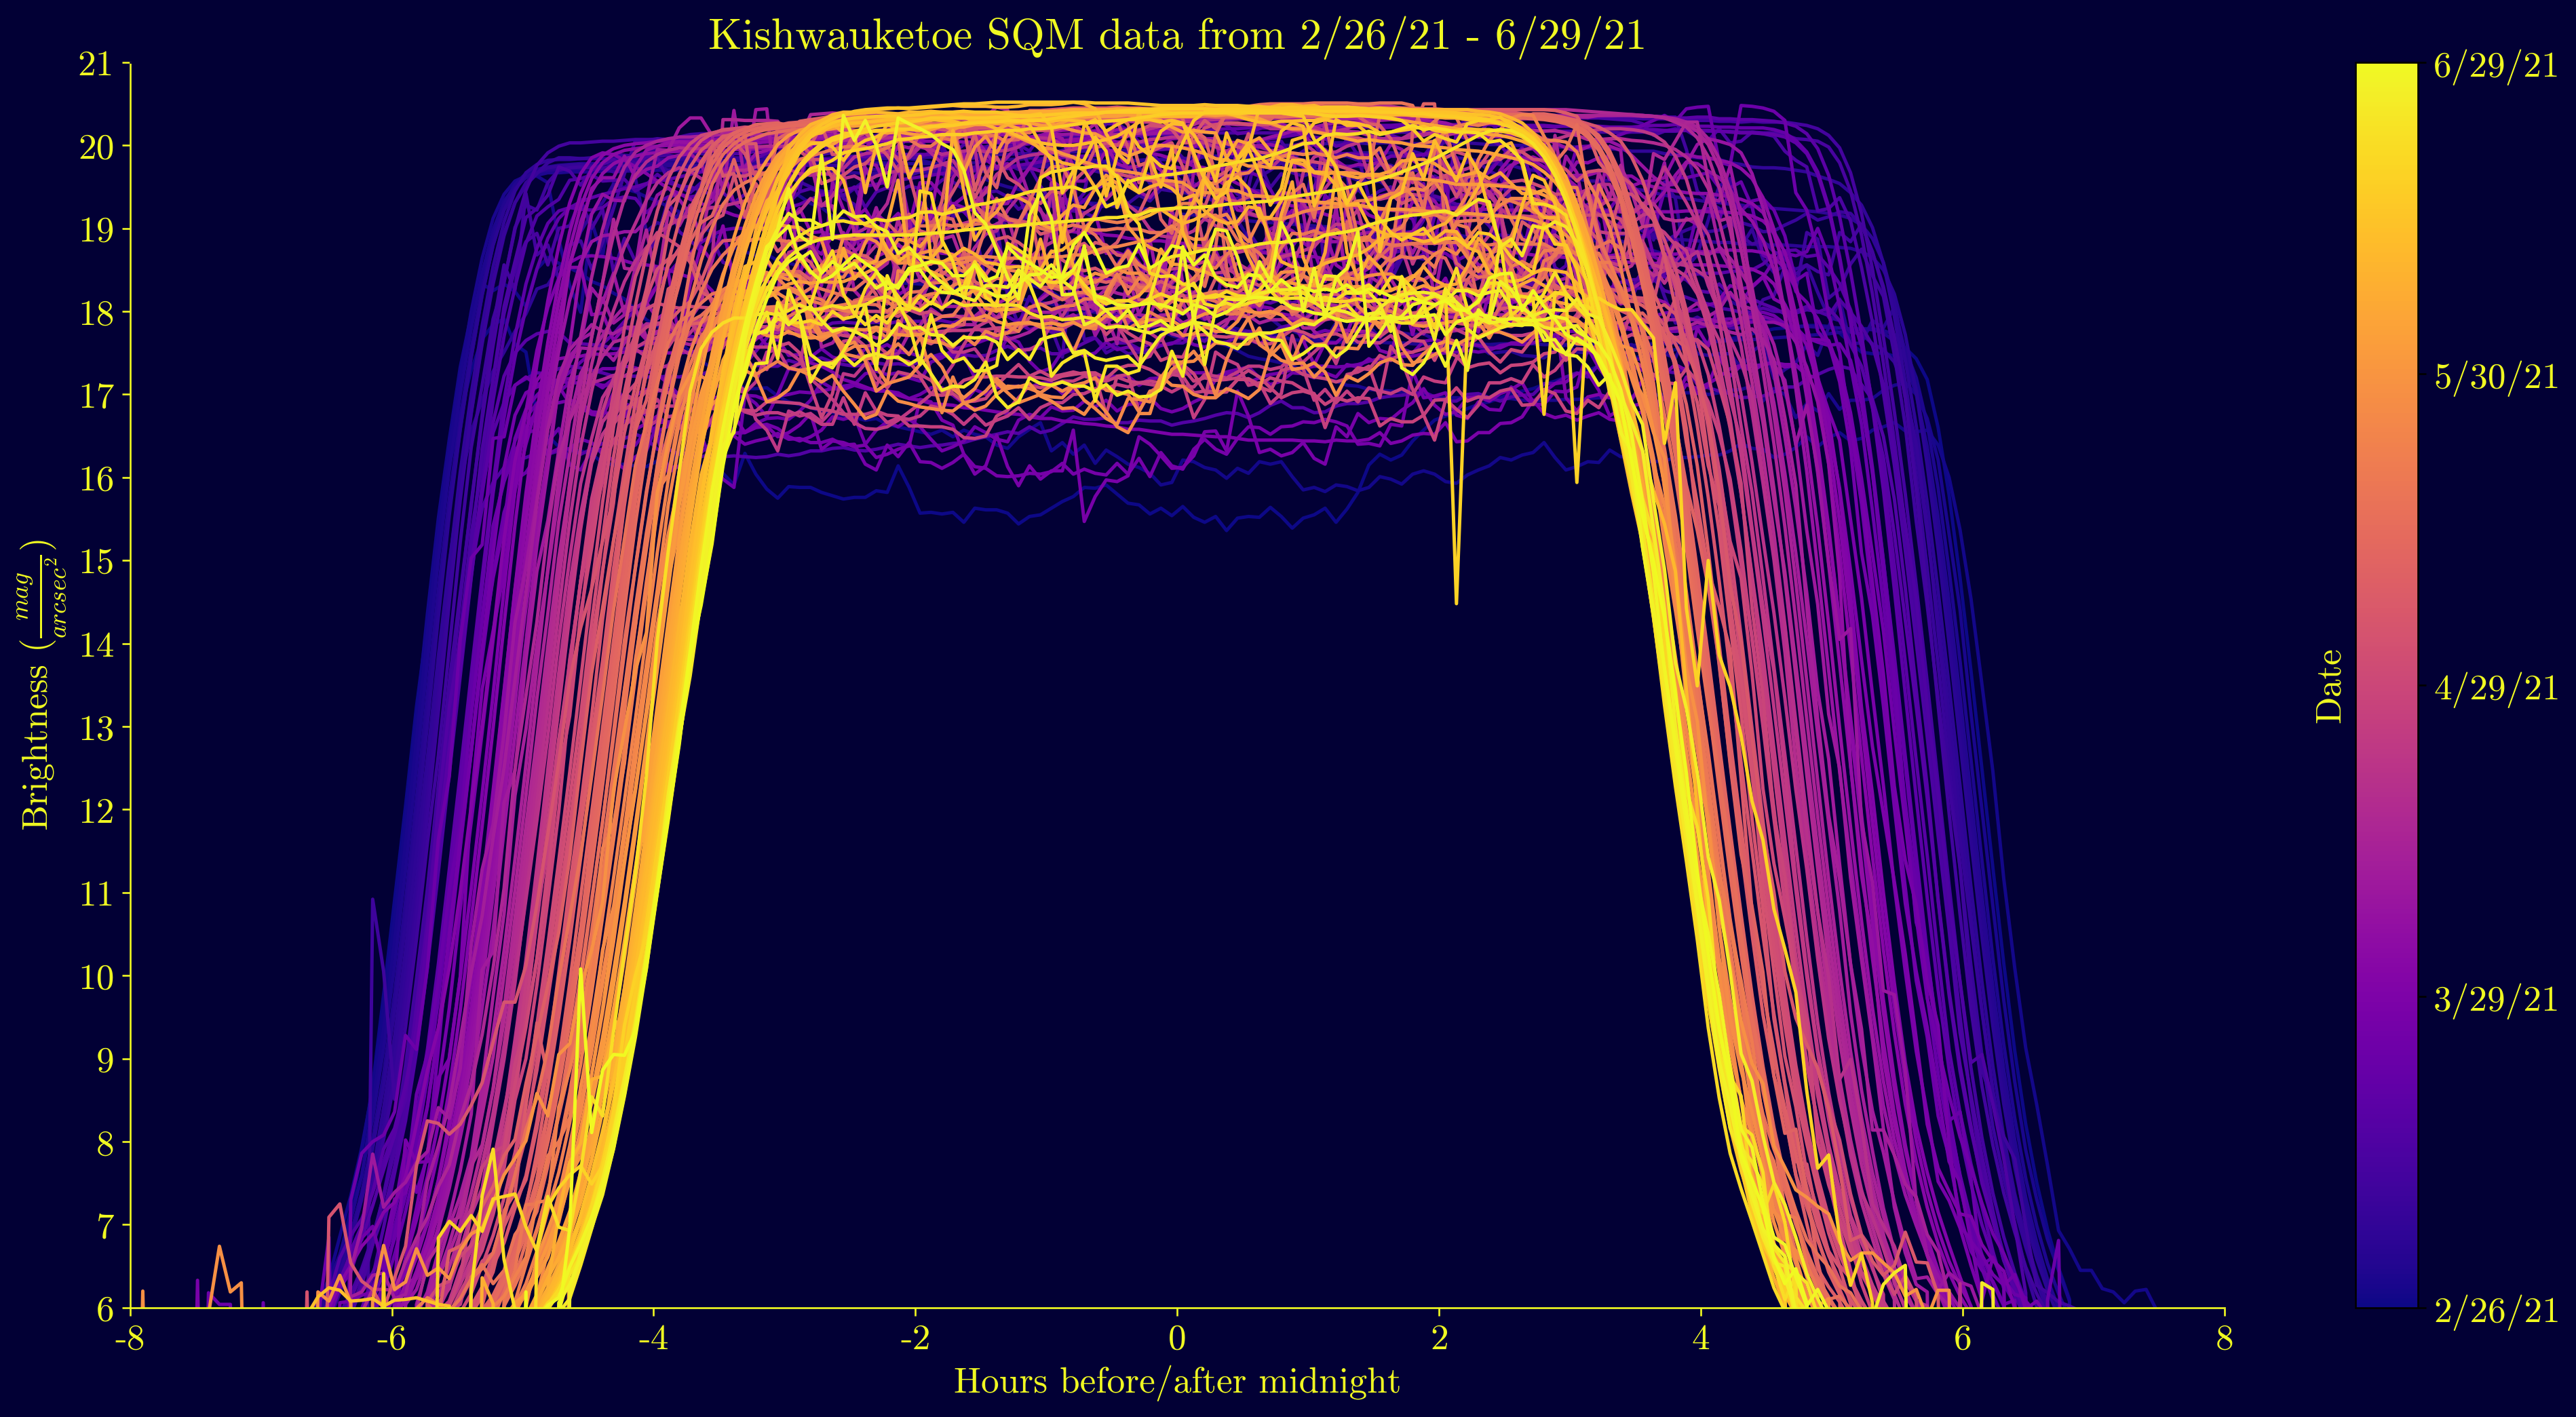

In [34]:
fig = plt.figure()  # sets up a figure
ax = plt.subplot()  # sets up a subplot
plt.rc("axes", unicode_minus=False)  # negative x-axis values plot correctly
fig.set_facecolor("xkcd:midnight blue")  # sets the axis background color
colors = plt.cm.plasma(
    np.linspace(0, 1, len(magsbyday))
)  # creates a colorspace for the lines/bar

plt.title(
    "Kishwauketoe SQM data from 2/26/21 - 6/29/21",
    color=colors[len(magsbyday) - 1],
)  # plots title

plt.xticks(
    [-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12]
)  # plots the x-axis ticks
plt.yticks([i for i in range(0, 22)])  # plots the y-axis ticks
plt.xlabel("Hours before/after midnight")  # plots the x-axis label
plt.ylabel(r"Brightness ($\frac{mag}{arcsec^2}$)")  # plots the y-axis label

ax.set_facecolor("xkcd:midnight blue")  # sets the graph background color
ax.xaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-axis label color
ax.yaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-axis label color
ax.tick_params(
    axis="x", colors=colors[len(magsbyday) - 1]
)  # sets the x-axis ticks color
ax.tick_params(
    axis="y", colors=colors[len(magsbyday) - 1]
)  # sets the y-axis ticks color
ax.spines["left"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-dimension color (left)
ax.spines["bottom"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-dimension color (bottom)
ax.spines["top"].set_color(
    "xkcd:midnight blue"
)  # sets the y-dimension color (top)
ax.spines["right"].set_color(
    "xkcd:midnight blue"
)  # sets the x-dimension color (right)

plt.ylim(6, 21)  # only plots y-values between (val,val)
plt.xlim((-8, 8))  # only plots x-values between (val,val)
plt.margins(0)  # sets the label/axis/ticks/etc margin to 0

colorbar = fig.colorbar(
    cm.ScalarMappable(cmap=cm.plasma), ticks=np.linspace(0, 1, 5), label="Date"
)  # plots colorbar
datelist = [
    "2/26/21",
    "3/29/21",
    "4/29/21",
    "5/30/21",
    "6/29/21",
]  # creates a list of dates for the colorbar
colorbar.ax.set_yticklabels(
    datelist, color=colors[len(magsbyday) - 1]
)  # plots the colorbar ticks with specific color
colorbar.ax.yaxis.label.set_color(
    color=colors[len(magsbyday) - 1]
)  # sets the colorbar label color
colorbar.ax.yaxis.set_label_position("left")  # sets the colorbar label position

plt.subplots_adjust(right=1.06)  # formatting so that the final rendered
plt.subplots_adjust(left=0.055)  # image has equal spacing between the text
plt.subplots_adjust(top=0.935)  # and sides of the image. Overall looks
plt.subplots_adjust(
    bottom=0.085
)  # nicer than default. Fiddle with at own risk.

for i in range(len(magsbyday)):  # loops over the list of lists of daily data
    plt.plot(
        np.linspace(-12, 12, 288), magsbyday[i], color=colors[i]
    )  # and plots them over each other with color
    # changing according to day
plt.show()
# fig.savefig('AllData', dpi=240, facecolor=fig.get_facecolor())            #uncomment line to save the image

In [260]:
magsbydayspliced = []  # creates new array for data by day
maxes = []  # only +2/-2 hours around midnight
mins = []  # and calculates max/min/mean for it
means = []
medians = []
for i in range(len(magsbyday)):  # loops over the number of days there are
    magsbydayspliced.append(
        magsbyday[i][120:169]
    )  # takes only the data +2/-2 around midnight
    maxes.append(max(magsbydayspliced[i]))  # calculates the max
    mins.append(min(magsbydayspliced[i]))  # calculates the min
    means.append(np.mean(magsbydayspliced[i]))  # calculates the mean
    medians.append(np.median(magsbydayspliced[i]))

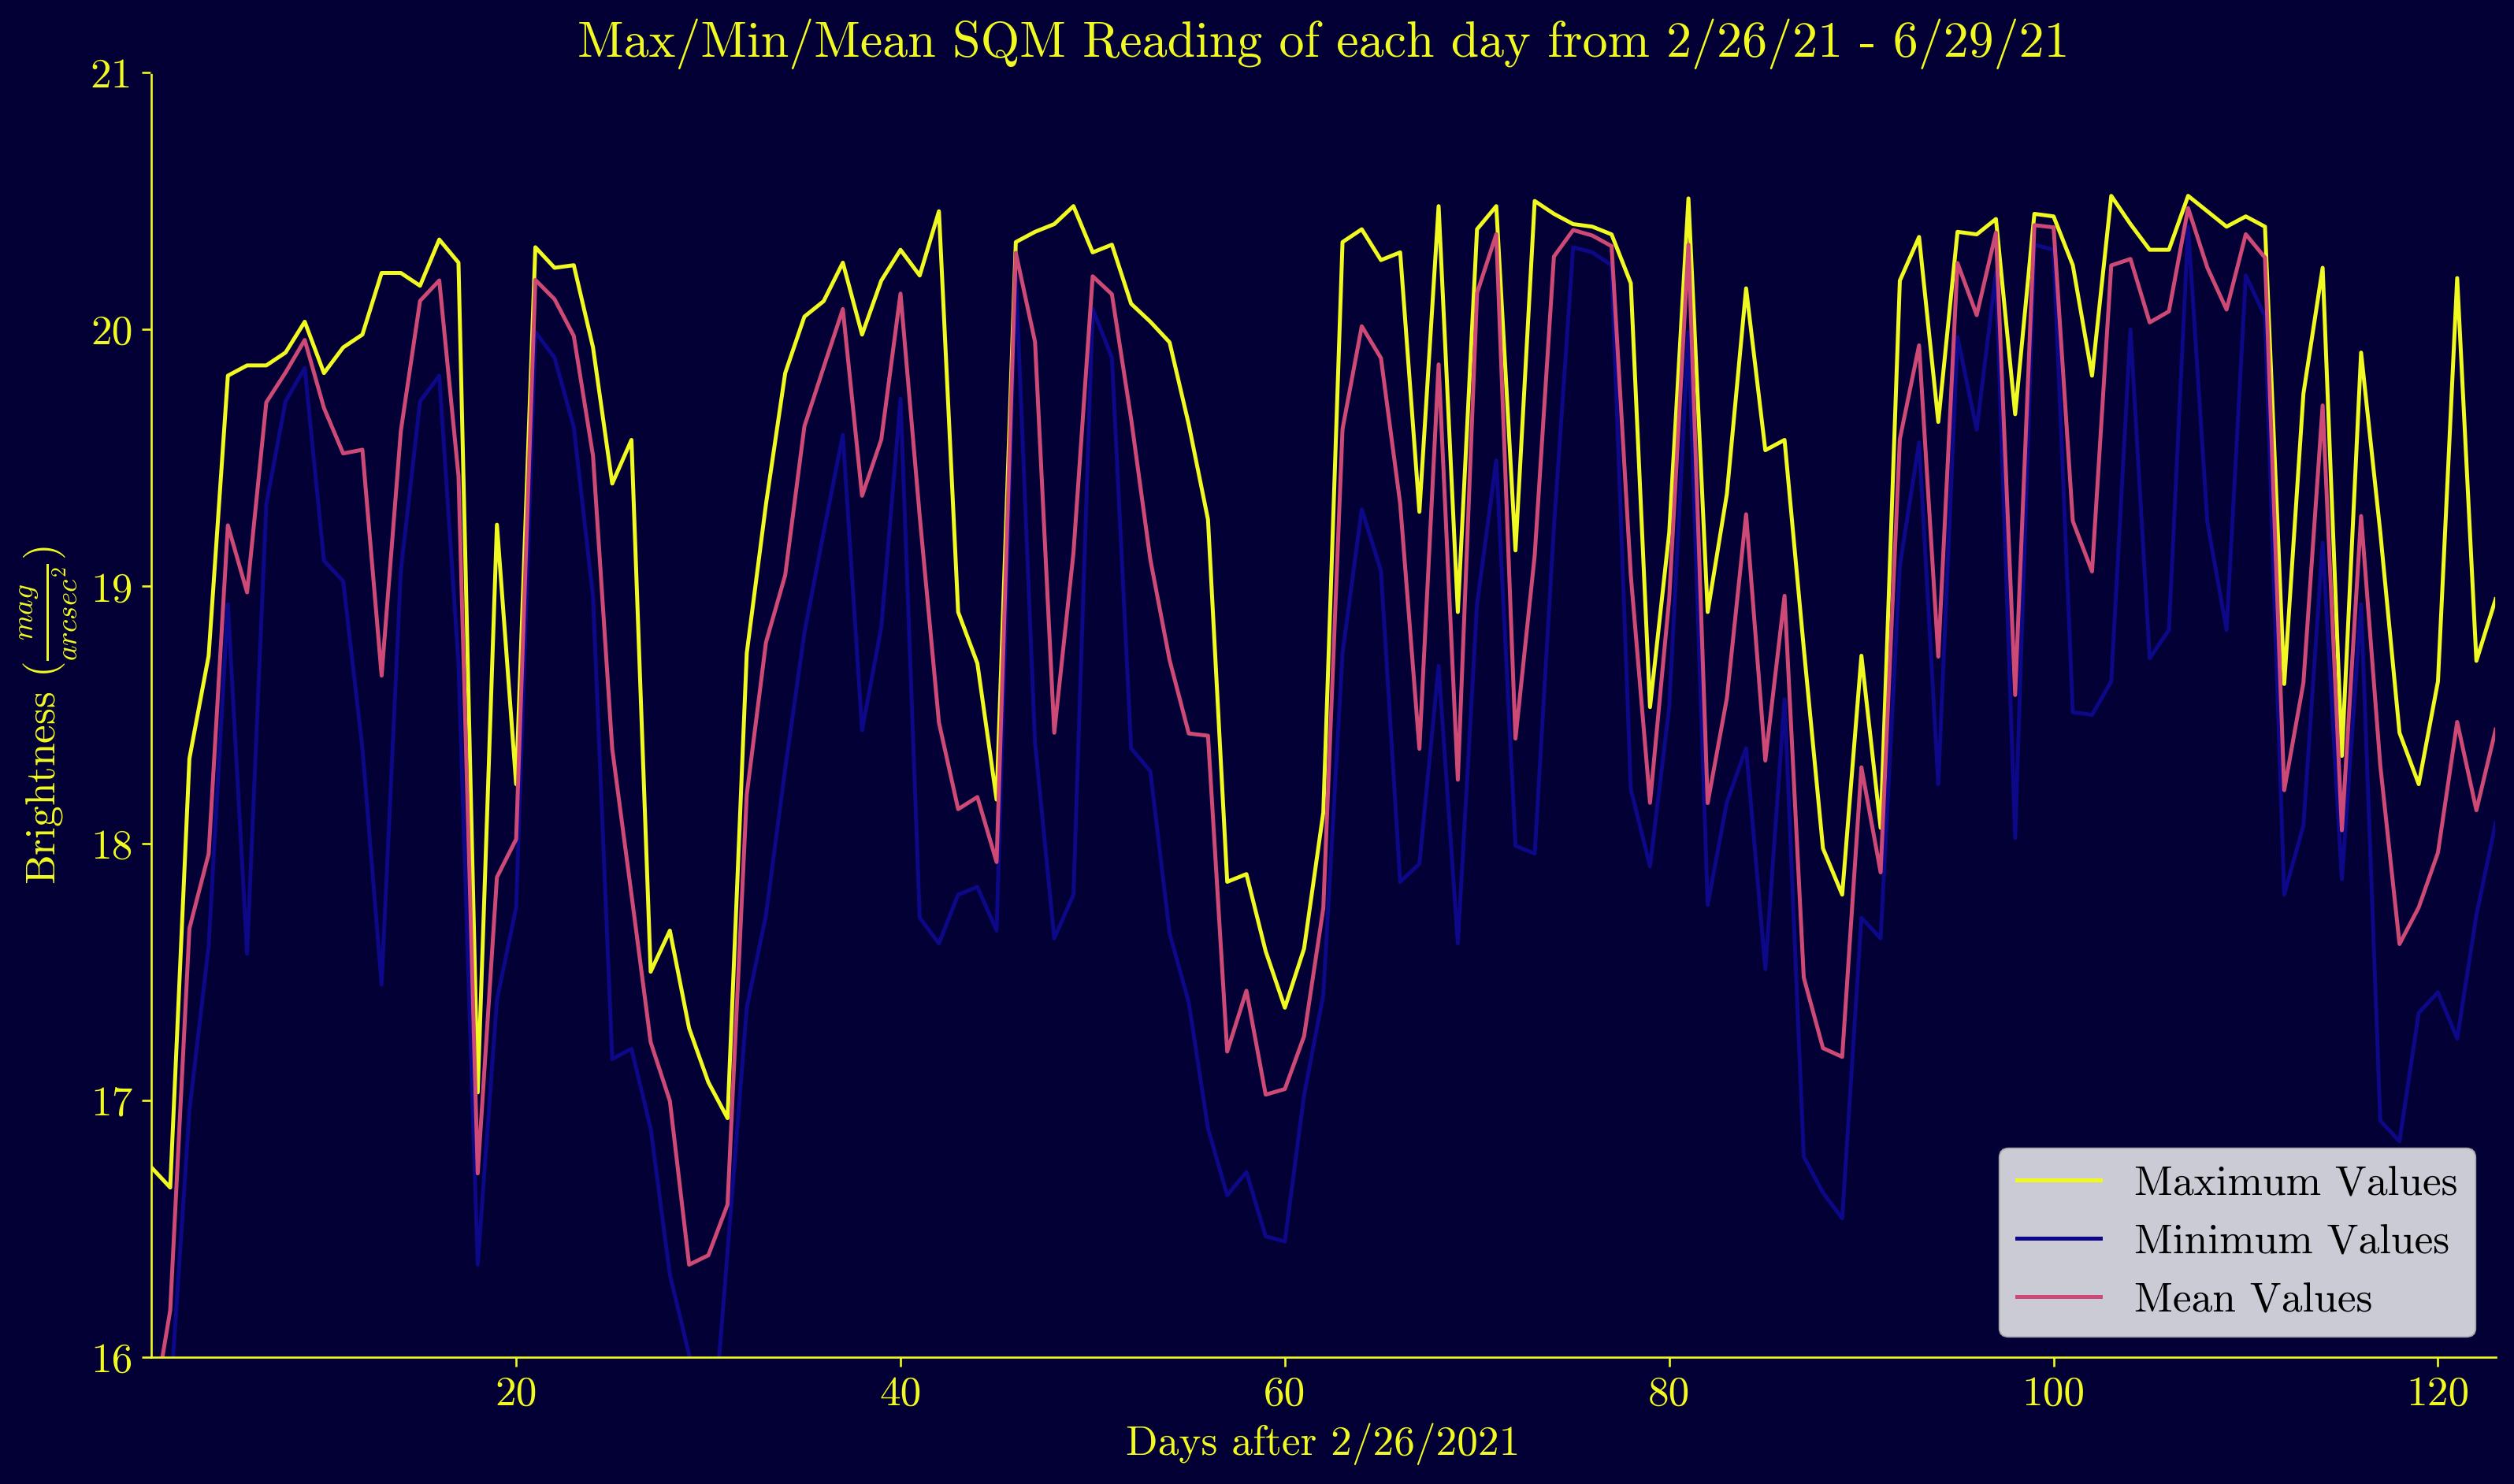

In [238]:
fig = plt.figure()  # sets up a figure
ax = plt.subplot()  # sets up a subplot
plt.rc("axes", unicode_minus=False)  # negative x-axis values plot correctly
fig.patch.set_facecolor("xkcd:midnight blue")  # sets the axis background color

plt.title(
    "Max/Min/Mean SQM Reading of each day from 2/26/21 - 6/29/21",
    color=colors[len(magsbyday) - 1],
)
# plots title
plt.xticks([0, 20, 40, 60, 80, 100, 120])  # plots x-ticks
plt.yticks([i for i in range(0, 22)])  # plots y-ticks
plt.xlabel("Days after 2/26/2021")  # plots x-label
plt.ylabel(r"Brightness ($\frac{mag}{arcsec^2}$)")  # plots y-label

ax.set_facecolor("xkcd:midnight blue")  # sets the graph background color
ax.xaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-axis label color
ax.yaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-axis label color
ax.tick_params(
    axis="x", colors=colors[len(magsbyday) - 1]
)  # sets the x-axis ticks color
ax.tick_params(
    axis="y", colors=colors[len(magsbyday) - 1]
)  # sets the y-axis ticks color
ax.spines["left"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-dimension color (left)
ax.spines["bottom"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-dimension color (bottom)
ax.spines["top"].set_color(
    "xkcd:midnight blue"
)  # sets the y-dimension color (top)
ax.spines["right"].set_color(
    "xkcd:midnight blue"
)  # sets the x-dimension color (right)

plt.ylim(16, 21)  # only plots y-values between (val,val)
plt.margins(0)  # sets the label/axis/ticks/etc margin to 0

xvals = np.linspace(1, 123, len(maxes))  # sets up the x-values for plotting
plt.plot(
    xvals, maxes, color=colors[len(magsbyday) - 1], label="Maximum Values"
)  # plots the max values
plt.plot(
    xvals, mins, color=colors[0], label="Minimum Values"
)  # plots the min values
plt.plot(
    xvals, means, color=colors[62], label="Mean Values"
)  # plots the mean values

plt.legend()  # plots the legend

plt.show()  # shows the plot
# fig.savefig('Max_Min_Mean', dpi=240, facecolor=fig.get_facecolor())        #uncomment line to save the image

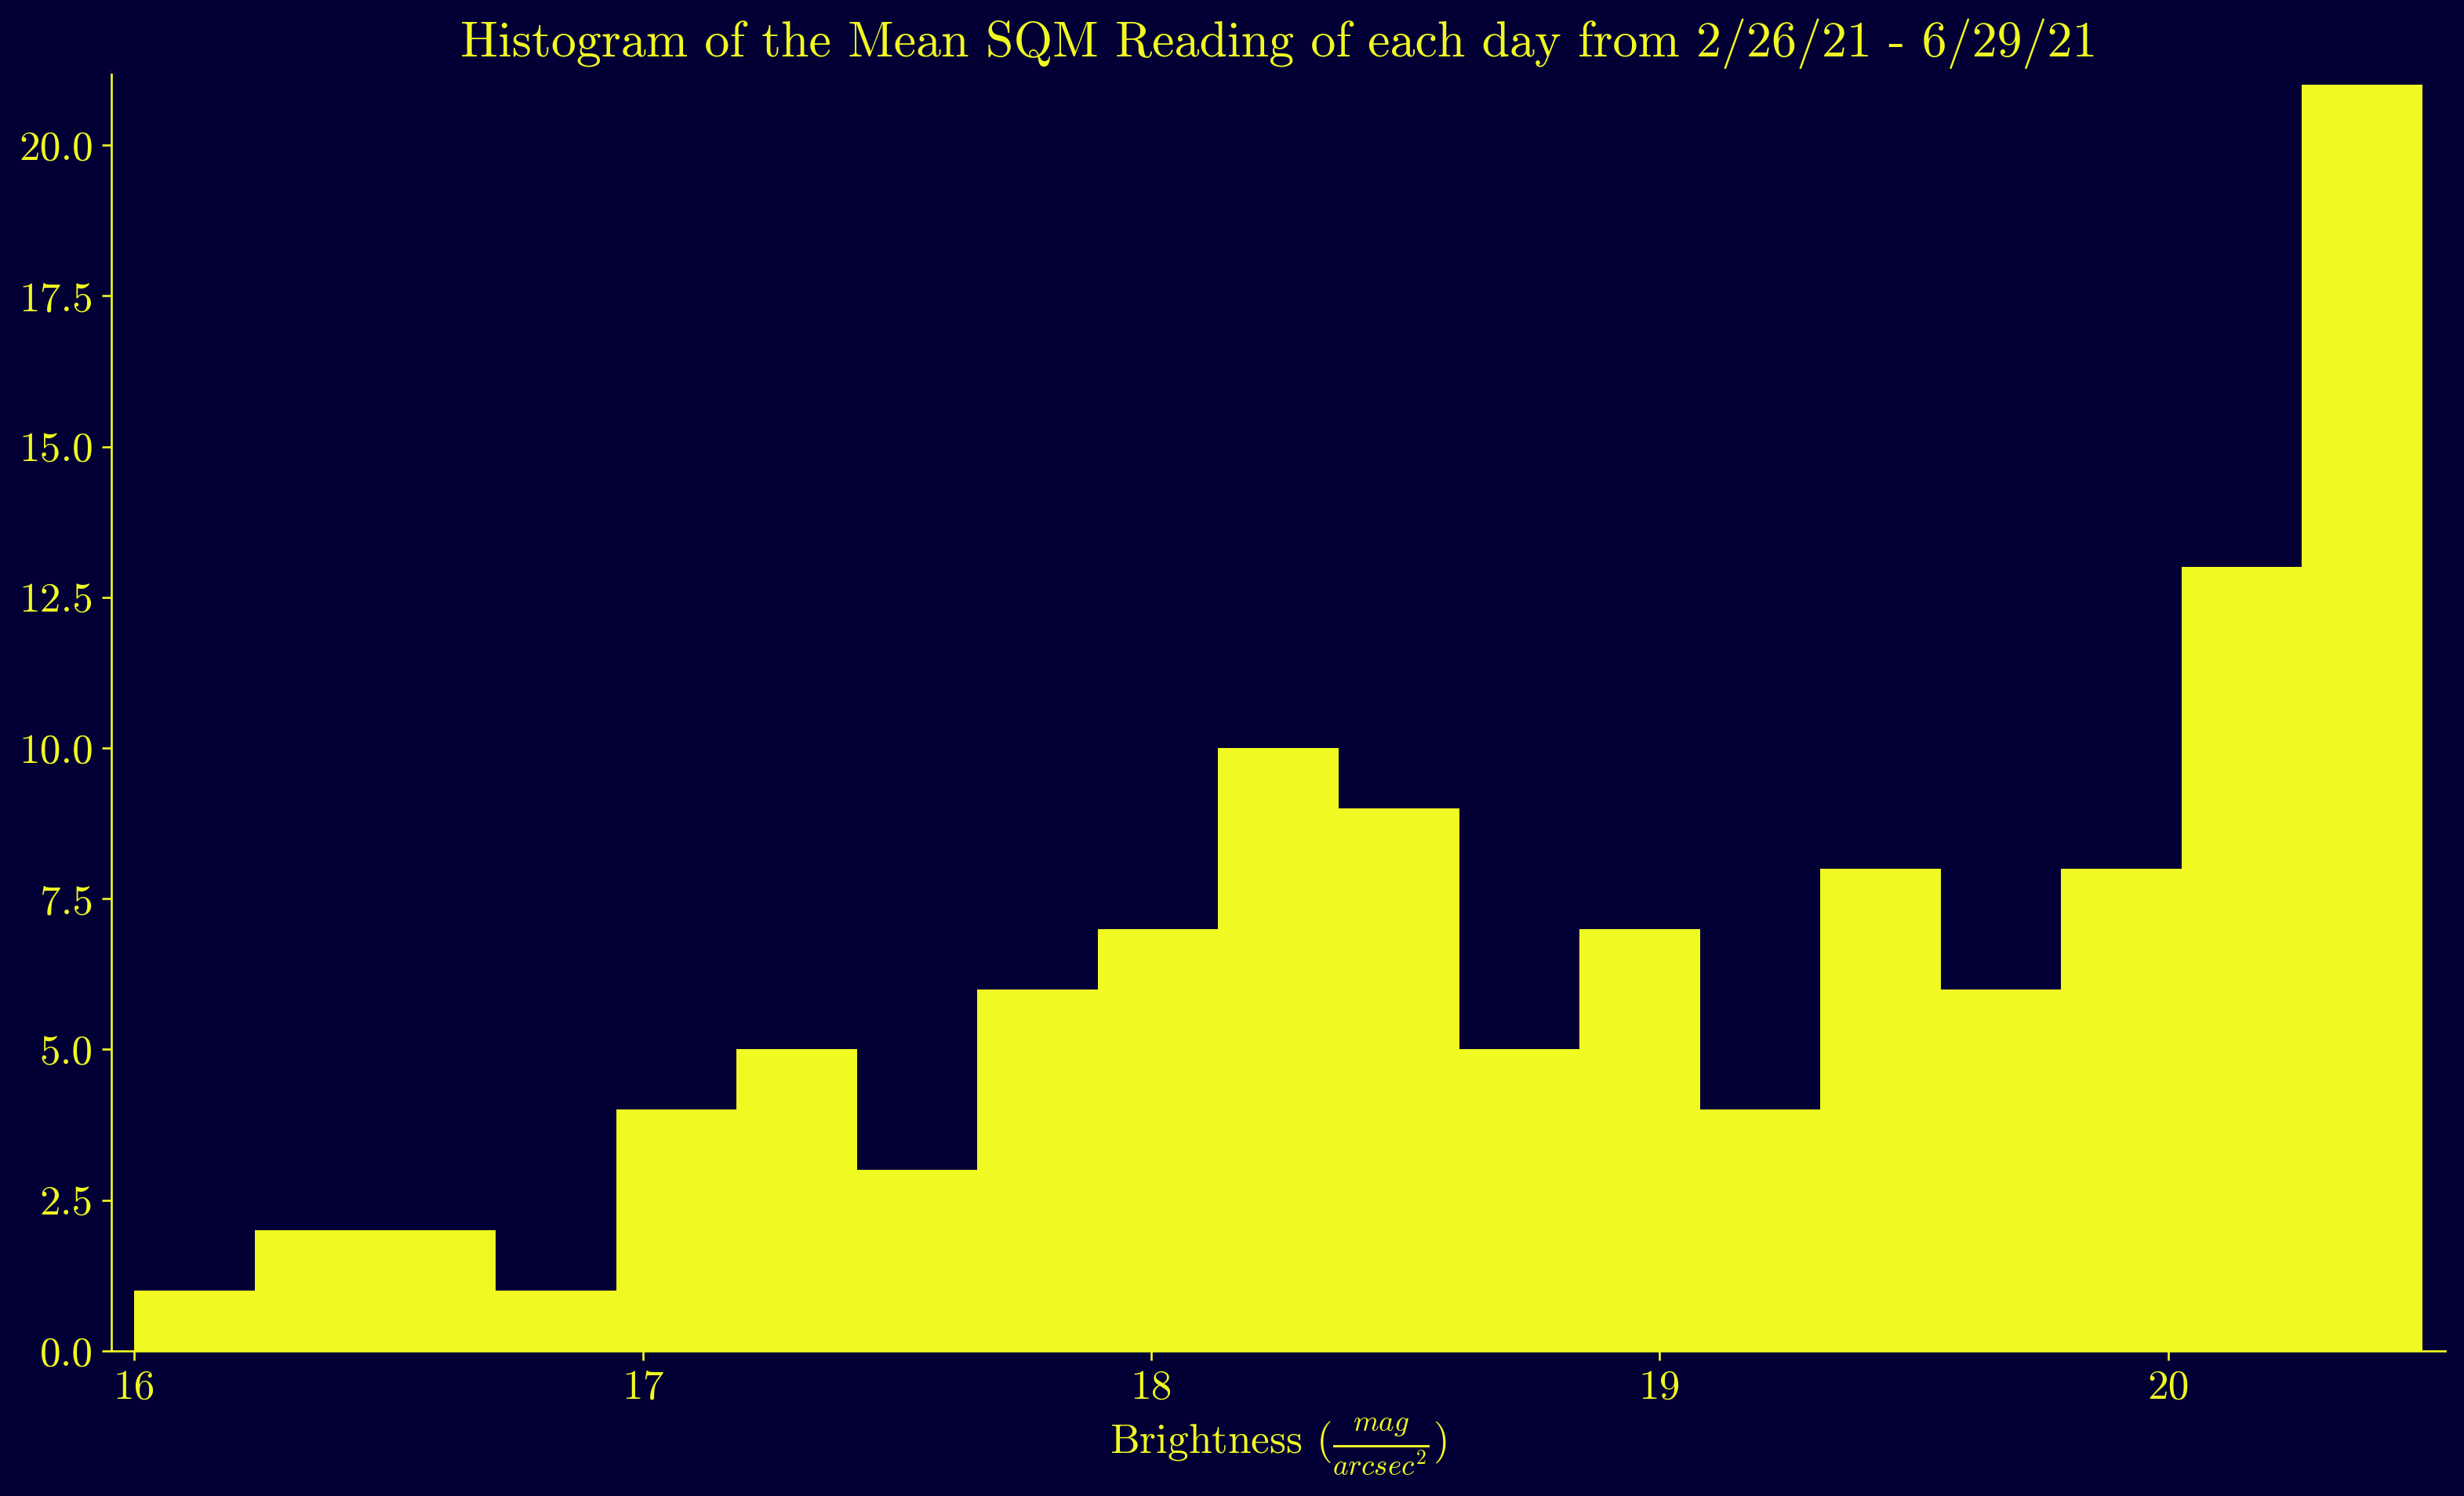

In [263]:
fig = plt.figure()  # sets up a figure
ax = plt.subplot()  # sets up a subplot
plt.rc("axes", unicode_minus=False)  # negative x-axis values plot correctly
fig.patch.set_facecolor("xkcd:midnight blue")  # sets the axis background color

plt.xlabel(r"Brightness ($\frac{mag}{arcsec^2}$)")  # sets the x-label
plt.title(
    "Histogram of the Mean SQM Reading of each day from 2/26/21 - 6/29/21",
    color=colors[len(magsbyday) - 1],
)
# plots the title
ax.set_facecolor("xkcd:midnight blue")  # sets the graph background color
ax.xaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-axis label color
ax.yaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-axis label color
ax.tick_params(
    axis="x", colors=colors[len(magsbyday) - 1]
)  # sets the x-axis ticks color
ax.tick_params(
    axis="y", colors=colors[len(magsbyday) - 1]
)  # sets the y-axis ticks color
ax.spines["left"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-dimension color (left)
ax.spines["bottom"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-dimension color (bottom)
ax.spines["top"].set_color(
    "xkcd:midnight blue"
)  # sets the y-dimension color (top)
ax.spines["right"].set_color(
    "xkcd:midnight blue"
)  # sets the x-dimension color (right)

plt.margins(0.01)  # sets the margin size to 0.01
# (better for histograms)
mybins = np.linspace(16, 20.5, 20)  # creates a list to be used as bin indexes
plt.hist(
    medians, bins=mybins, color=colors[len(magsbyday) - 1]
)  # plots the histogram

plt.show()  # shows the plot
# fig.savefig('AllHistogram', dpi=240, facecolor=fig.get_facecolor())        #uncomment line to save the image

In [38]:
print(
    "================================"
)  # this just prints the data calculated so far
print("Maximum of the Maxes    = ", max(maxes))
print("Minimum of the Maxes    = ", min(maxes))
print("Mean of the Maxes       = ", np.around(np.mean(maxes), decimals=2))
print("================================")
print("Maximum of the Minimums = ", max(mins))
print("Minimum of the Minimums = ", min(mins))
print("Mean of the Minimums    = ", np.around(np.mean(mins), decimals=2))
print("================================")
print("Maximum of the Means    = ", np.around(max(means), decimals=2))
print("Minimum of the Means    = ", np.around(min(means), decimals=2))
print("Mean of the Means       = ", np.around(np.mean(means), decimals=2))
print("================================")

Maximum of the Maxes    =  20.52
Minimum of the Maxes    =  16.66
Mean of the Maxes       =  19.5
Maximum of the Minimums =  20.4
Minimum of the Minimums =  15.36
Mean of the Minimums    =  18.31
Maximum of the Means    =  20.47
Minimum of the Means    =  15.73
Mean of the Means       =  18.93


In [39]:
wf = pd.read_table("C:\\Users\\Simon\\Downloads\\totalweatherdata.csv", sep=",")
weatherdata = list(wf["Cloud Cover"])  # reads in locally stored weather data

In [40]:
weatherdatabyday = (
    []
)  # creates an list that will be filled with lists of each day's worth of data
weathertemp = (
    []
)  # creates a temporary list to be appended onto the previous list sequentially
counter = 0  # institutes a counter to control for when to indicate that the day has changed
for i in range(len(weatherdata)):  # loops over the entire length of the data
    weathertemp.append(
        weatherdata[i]
    )  # appends each data point into the temporary temporary list
    counter = counter + 1  # counts up by one for each point
    if (
        counter == 288
    ):  # checks if the counter has reached 288 (288 five-minute intervals in a day)
        counter = 0  # resets the counter
        weatherdatabyday.append(
            weathertemp
        )  # appends the temporary list to the permanent list (a list of lists)
        weathertemp = []  # resets the temporary list

weatherdatabydayspliced = []  # creates a list for the spliced weatherdata
weatherdatameans = []  # creates a list for the spliced weatherdata means
for i in range(len(weatherdatabyday)):  # loops through the weatherdata
    weatherdatabydayspliced.append(
        weatherdatabyday[i][121:169]
    )  # appends the midnight data onto the spliced list
    tempsplicedarray = np.asarray(
        weatherdatabydayspliced[i]
    )  # temporarily puts the ith day into a new array
    nan_array = np.isnan(tempsplicedarray)
    not_nan_array = ~nan_array  # this code block takes any nan values in the
    tempmeanarray = tempsplicedarray[
        not_nan_array
    ]  # weatherdata and removes them from the dataset
    weatherdatameans.append(np.mean(tempmeanarray))

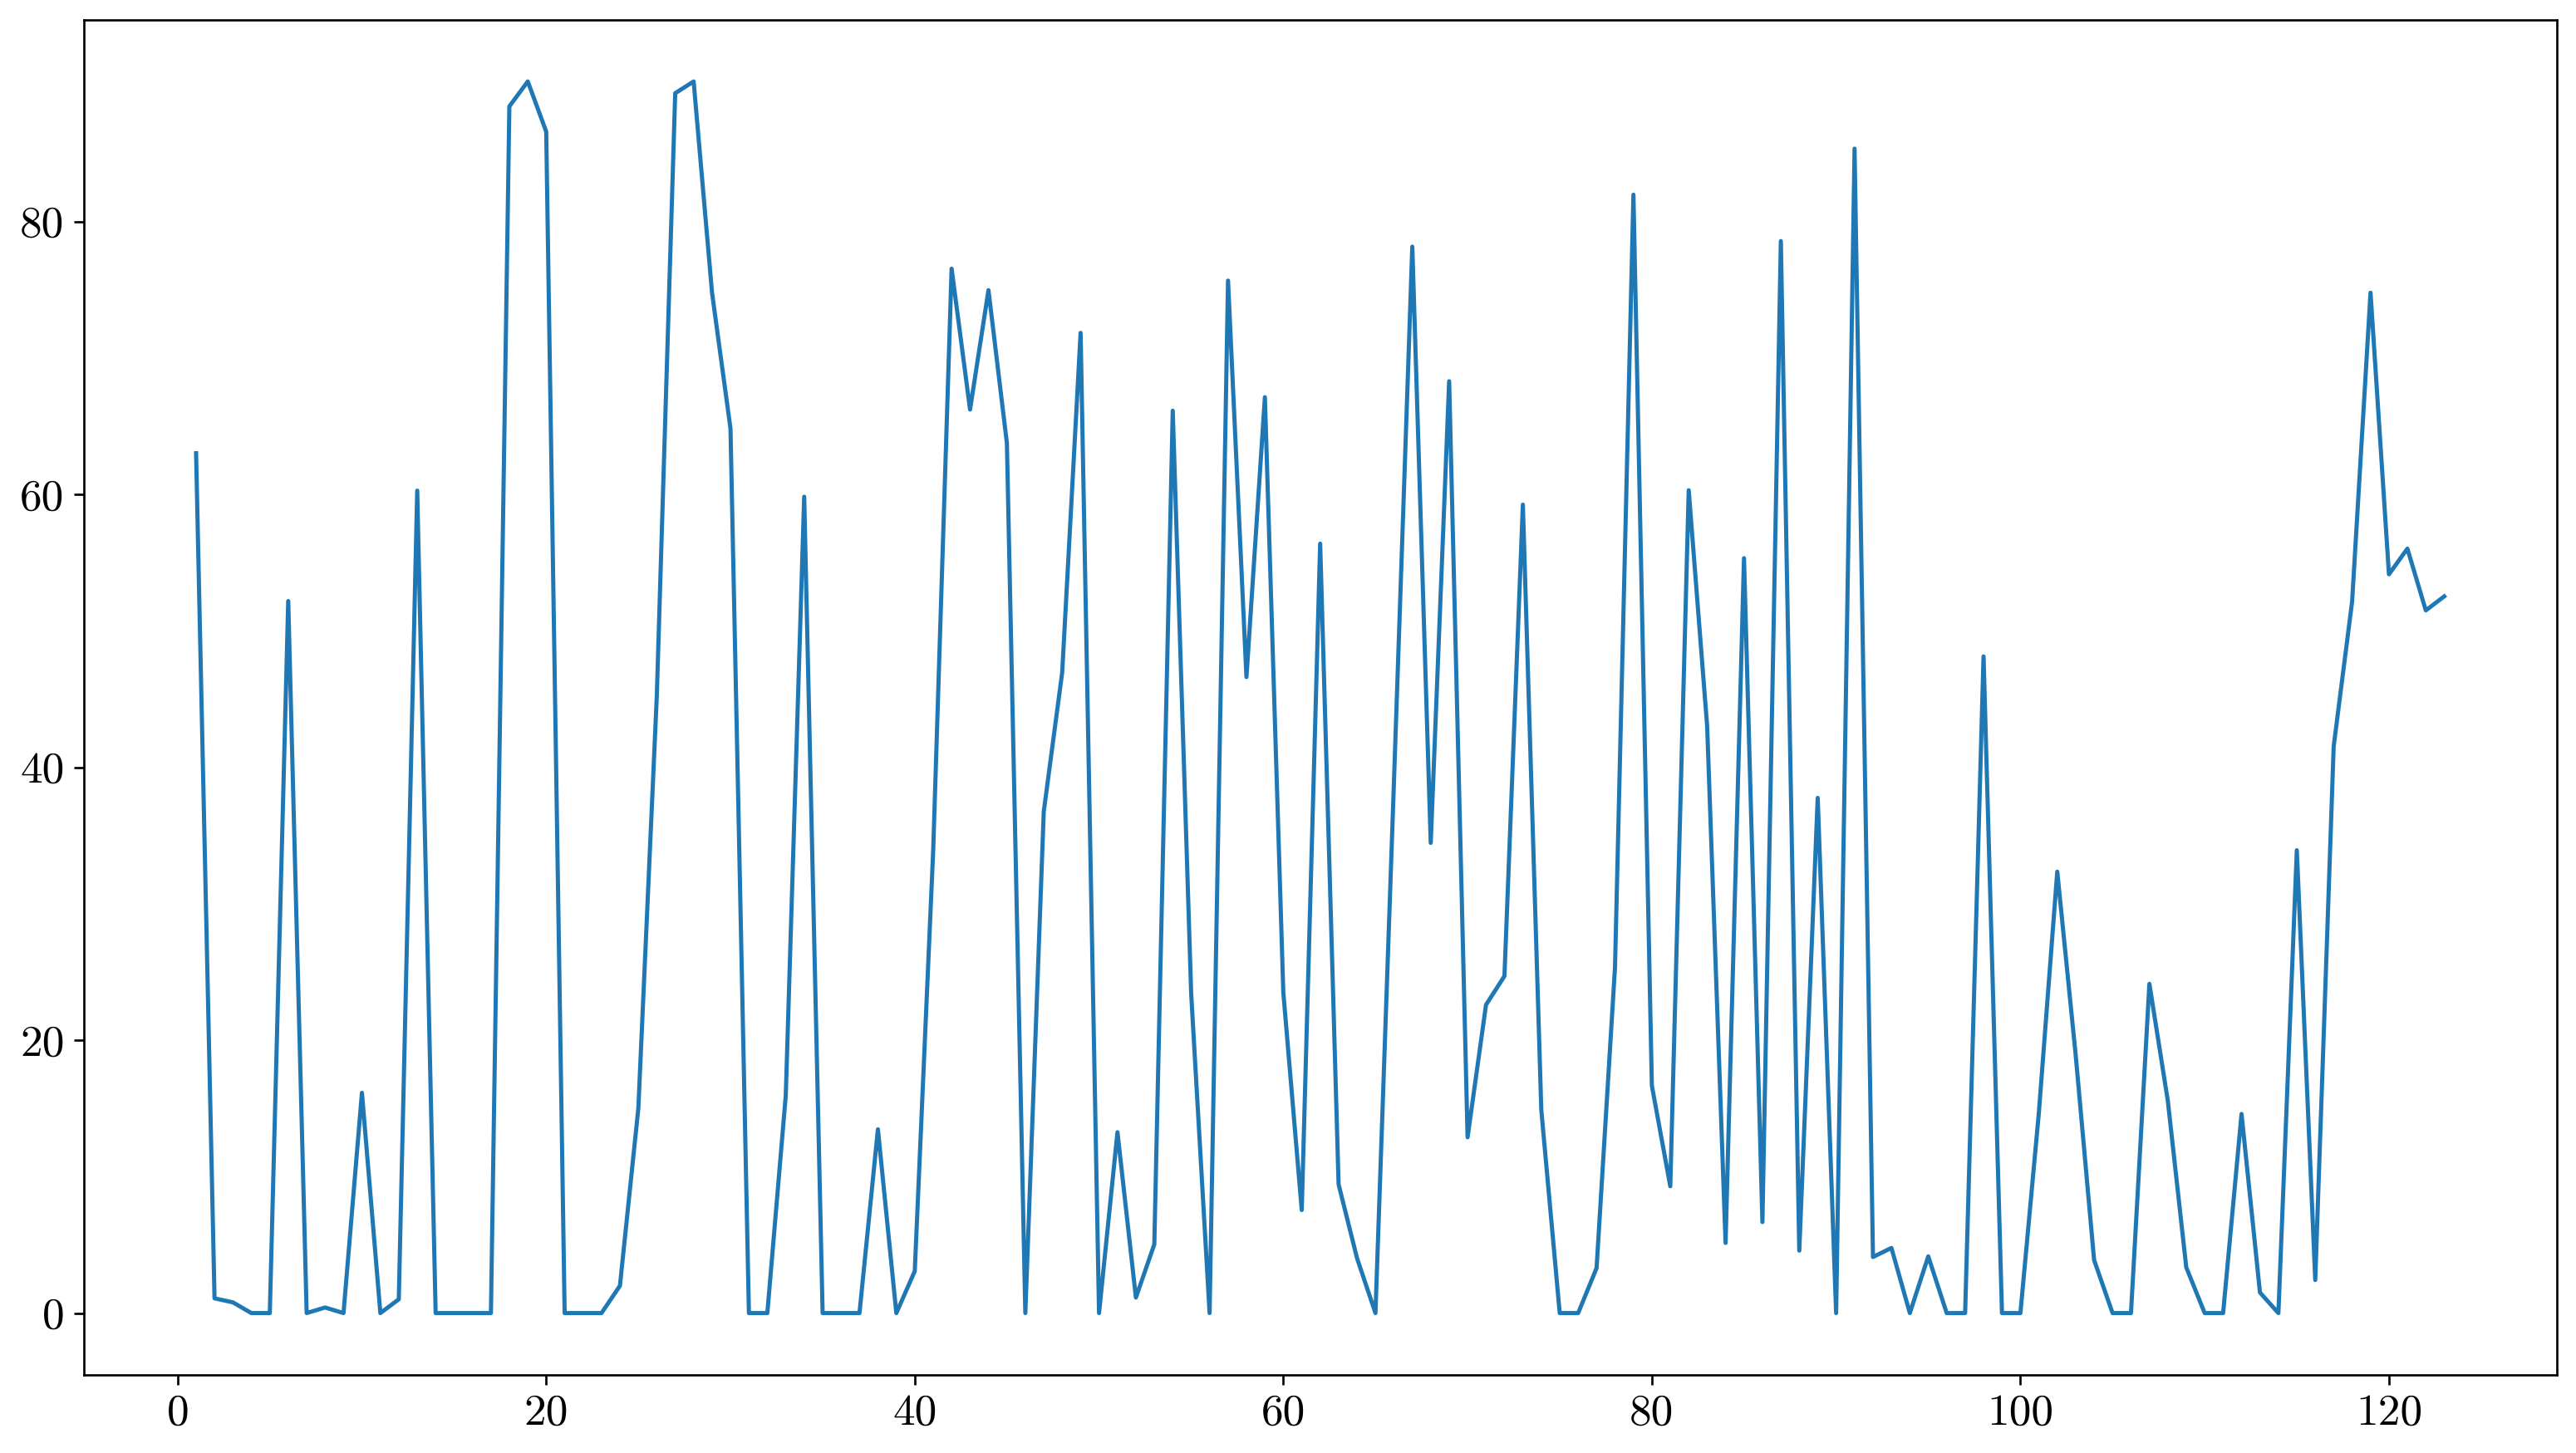

In [41]:
plt.plot(
    np.linspace(1, len(weatherdatameans), len(weatherdatameans)),
    weatherdatameans,
)
plt.show()  # plots the mean nightly weatherdata raw

In [42]:
weatherdatameans = np.asarray(
    weatherdatameans
)  # takes the weatherdatameans array and converts
weatherdatameansbool = (
    weatherdatameans == 0.0
)  # it into a bool array where 0.0 = True

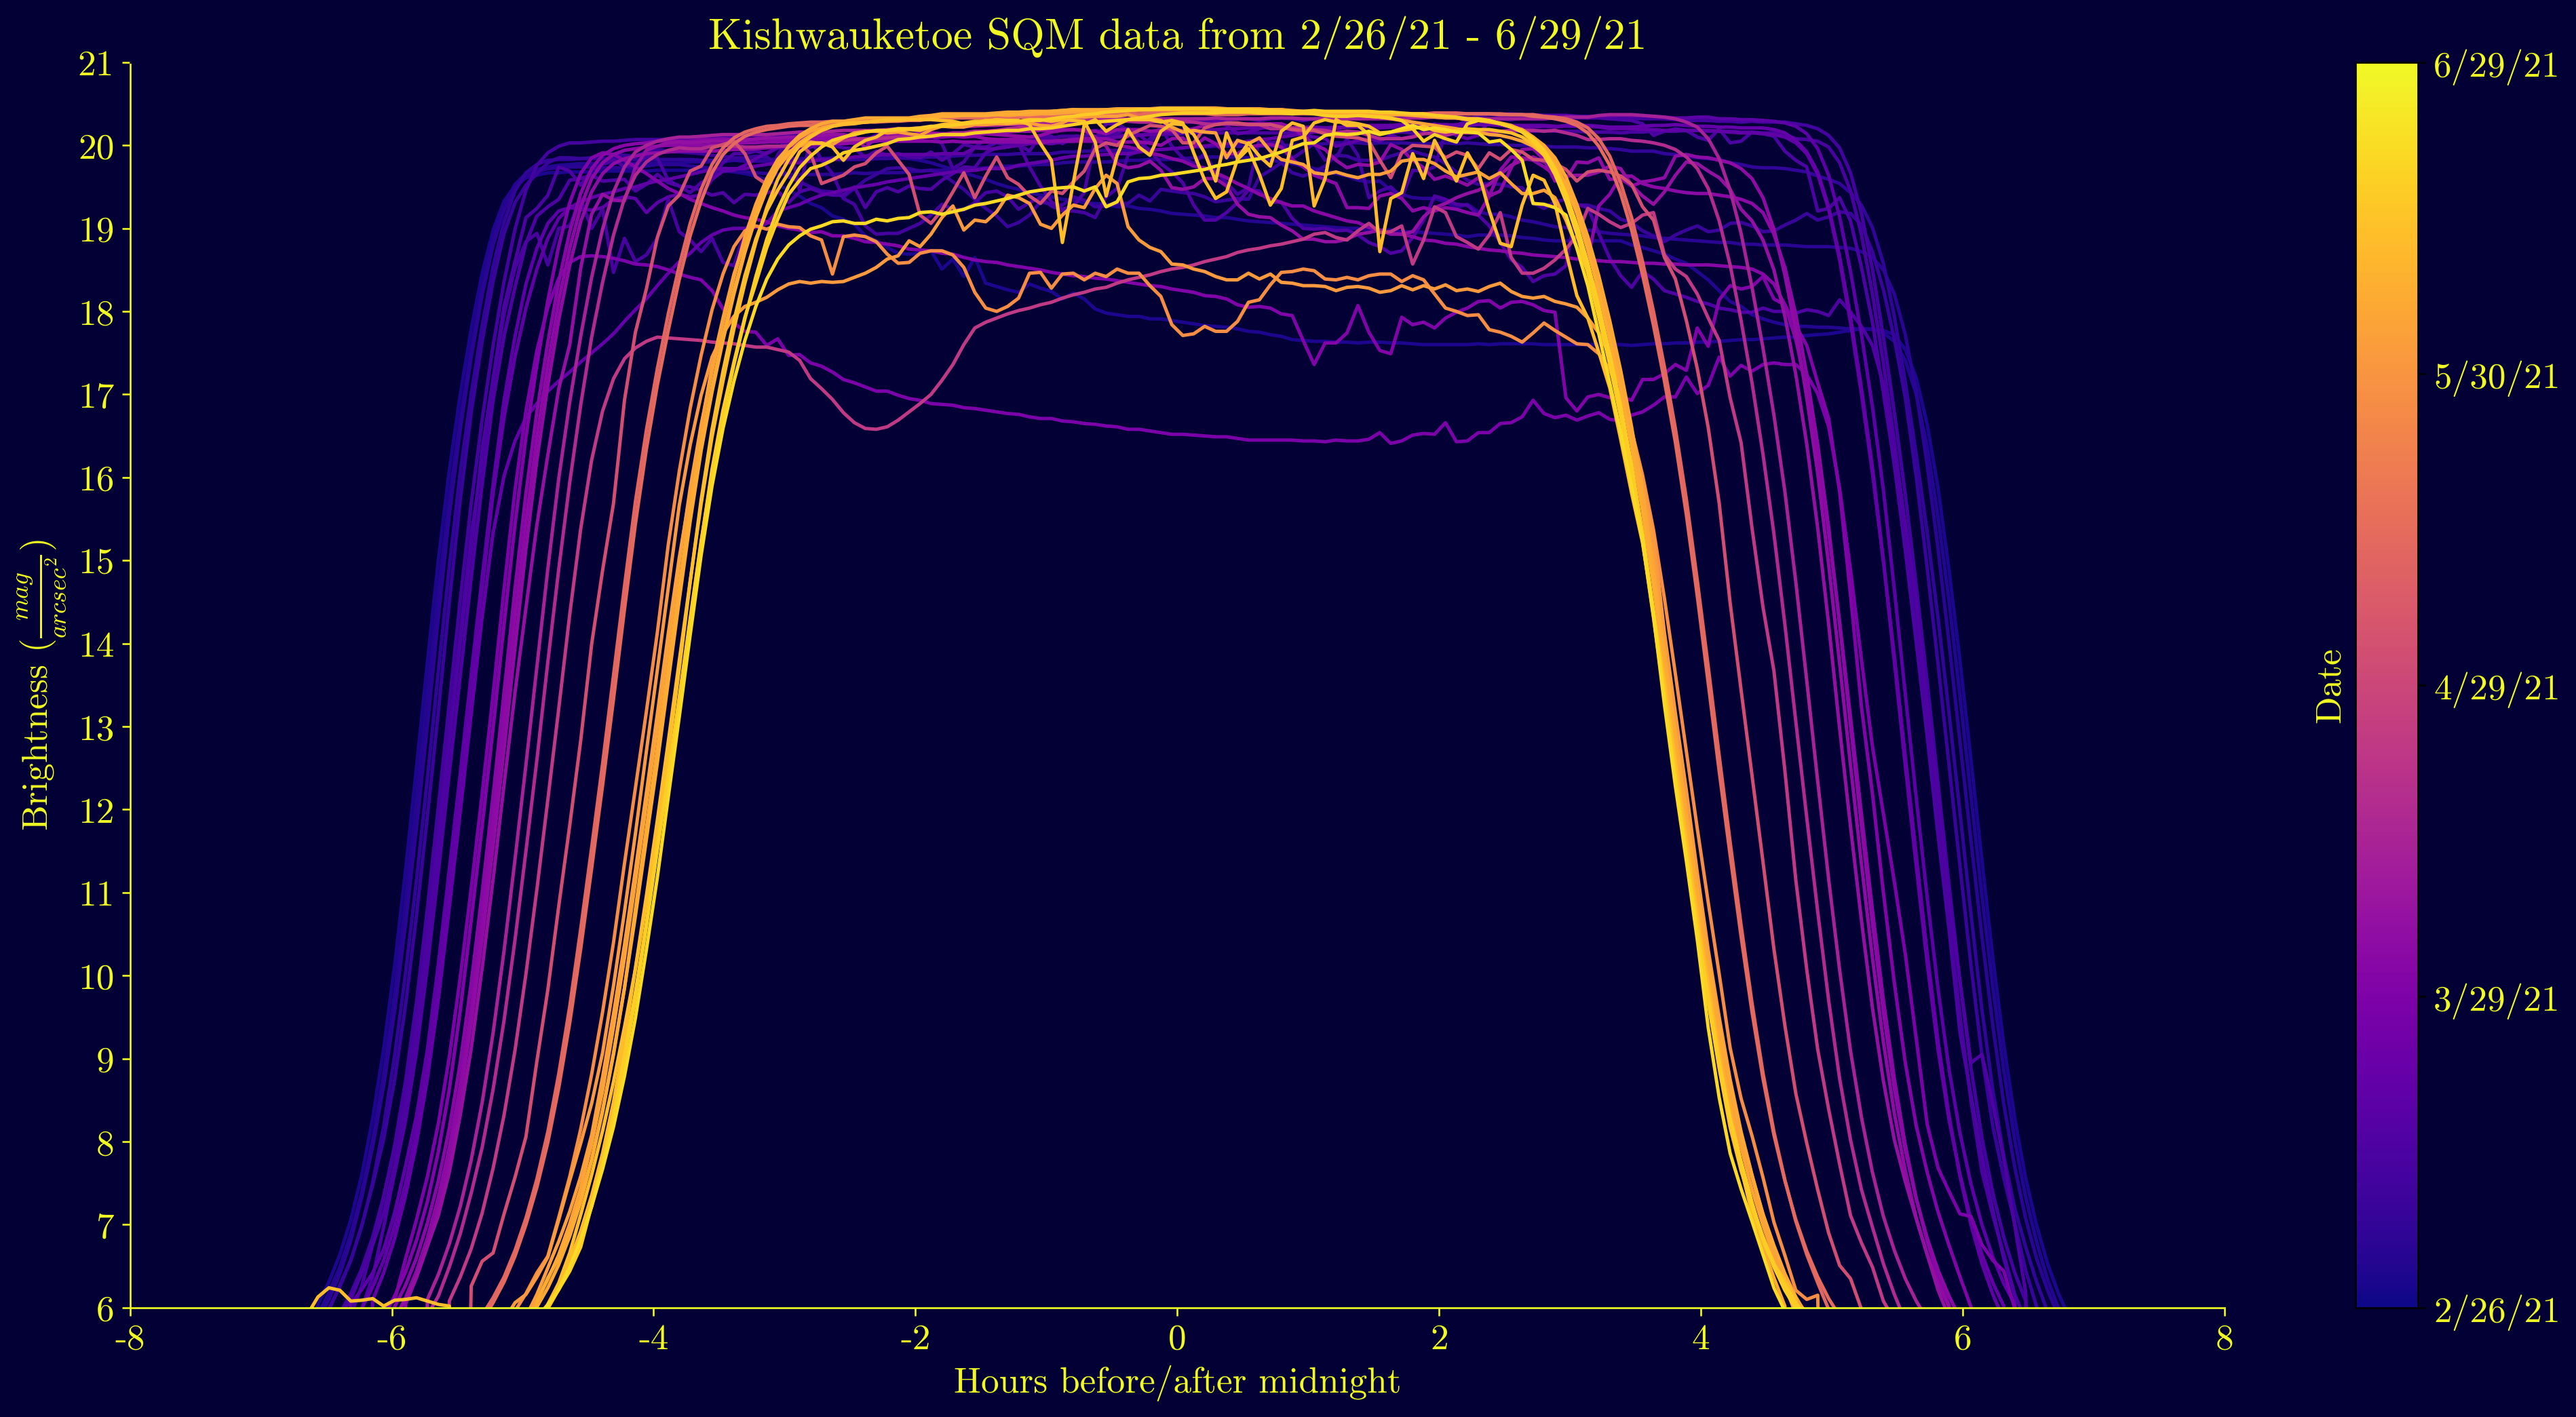

In [43]:
fig = plt.figure()  # sets up a figure
ax = plt.subplot()  # sets up a subplot
plt.rc("axes", unicode_minus=False)  # negative x-axis values plot correctly
fig.set_facecolor("xkcd:midnight blue")  # sets the axis background color
colors = plt.cm.plasma(
    np.linspace(0, 1, len(magsbyday))
)  # creates a colorspace for the lines/bar

plt.title(
    "Kishwauketoe SQM data from 2/26/21 - 6/29/21",
    color=colors[len(magsbyday) - 1],
)  # plots title

plt.xticks(
    [-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12]
)  # plots the x-axis ticks
plt.yticks([i for i in range(0, 22)])  # plots the y-axis ticks
plt.xlabel("Hours before/after midnight")  # plots the x-axis label
plt.ylabel(r"Brightness ($\frac{mag}{arcsec^2}$)")  # plots the y-axis label

ax.set_facecolor("xkcd:midnight blue")  # sets the graph background color
ax.xaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-axis label color
ax.yaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-axis label color
ax.tick_params(
    axis="x", colors=colors[len(magsbyday) - 1]
)  # sets the x-axis ticks color
ax.tick_params(
    axis="y", colors=colors[len(magsbyday) - 1]
)  # sets the y-axis ticks color
ax.spines["left"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-dimension color (left)
ax.spines["bottom"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-dimension color (bottom)
ax.spines["top"].set_color(
    "xkcd:midnight blue"
)  # sets the y-dimension color (top)
ax.spines["right"].set_color(
    "xkcd:midnight blue"
)  # sets the x-dimension color (right)

plt.ylim(6, 21)  # only plots y-values between (val,val)
plt.xlim((-8, 8))  # only plots x-values between (val,val)
plt.margins(0)  # sets the label/axis/ticks/etc margin to 0

colorbar = fig.colorbar(
    cm.ScalarMappable(cmap=cm.plasma), ticks=np.linspace(0, 1, 5), label="Date"
)  # plots colorbar
datelist = [
    "2/26/21",
    "3/29/21",
    "4/29/21",
    "5/30/21",
    "6/29/21",
]  # creates a list of dates for the colorbar
colorbar.ax.set_yticklabels(
    datelist, color=colors[len(magsbyday) - 1]
)  # plots the colorbar ticks with specific color
colorbar.ax.yaxis.label.set_color(
    color=colors[len(magsbyday) - 1]
)  # sets the colorbar label color
colorbar.ax.yaxis.set_label_position("left")  # sets the colorbar label position

plt.subplots_adjust(right=1.06)  # formatting so that the final rendered
plt.subplots_adjust(left=0.055)  # image has equal spacing between the text
plt.subplots_adjust(top=0.935)  # and sides of the image. Overall looks
plt.subplots_adjust(
    bottom=0.085
)  # nicer than default. Fiddle with at own risk.

for i in range(len(magsbyday)):  # loops over the magsbyday data and only plots
    if (
        weatherdatameansbool[i] == True
    ):  # the days where weathermeansbool[i] = True
        plt.plot(
            np.linspace(-12, 12, 288), magsbyday[i], color=colors[i]
        )  # and plots them over each other with color
        # changing according to day
plt.show()
# fig.savefig('MinusCData', dpi=240, facecolor=fig.get_facecolor())          #uncomment line if you want to save the image

In [124]:
clearmaxes = []  # makes arrays for each value to measure
clearmins = []
clearmeans = []
clearmedians = []
cleardays = []
for i in range(len(weatherdatabydayspliced)):  # loops through each day of data
    if (
        weatherdatameansbool[i] == True
    ):  # only appends values for clear days to the lists
        cleardays.append(magsbyday[i])
        clearmaxes.append(max(magsbydayspliced[i]))
        clearmins.append(min(magsbydayspliced[i]))
        clearmeans.append(np.mean(magsbydayspliced[i]))
        clearmedians.append(np.median(magsbydayspliced[i]))
clearmeans = np.asarray(
    clearmeans
)  # converts to numpy array for outlier removal
clearmedians = np.asarray(clearmedians)

In [126]:
newclearmeans = clearmeans[
    abs(clearmeans - np.mean(clearmeans)) < 2 * np.std(clearmeans)
]  # removes outliers
newclearmedians = clearmedians[
    abs(clearmedians - np.mean(clearmedians)) < 2 * np.std(clearmedians)
]

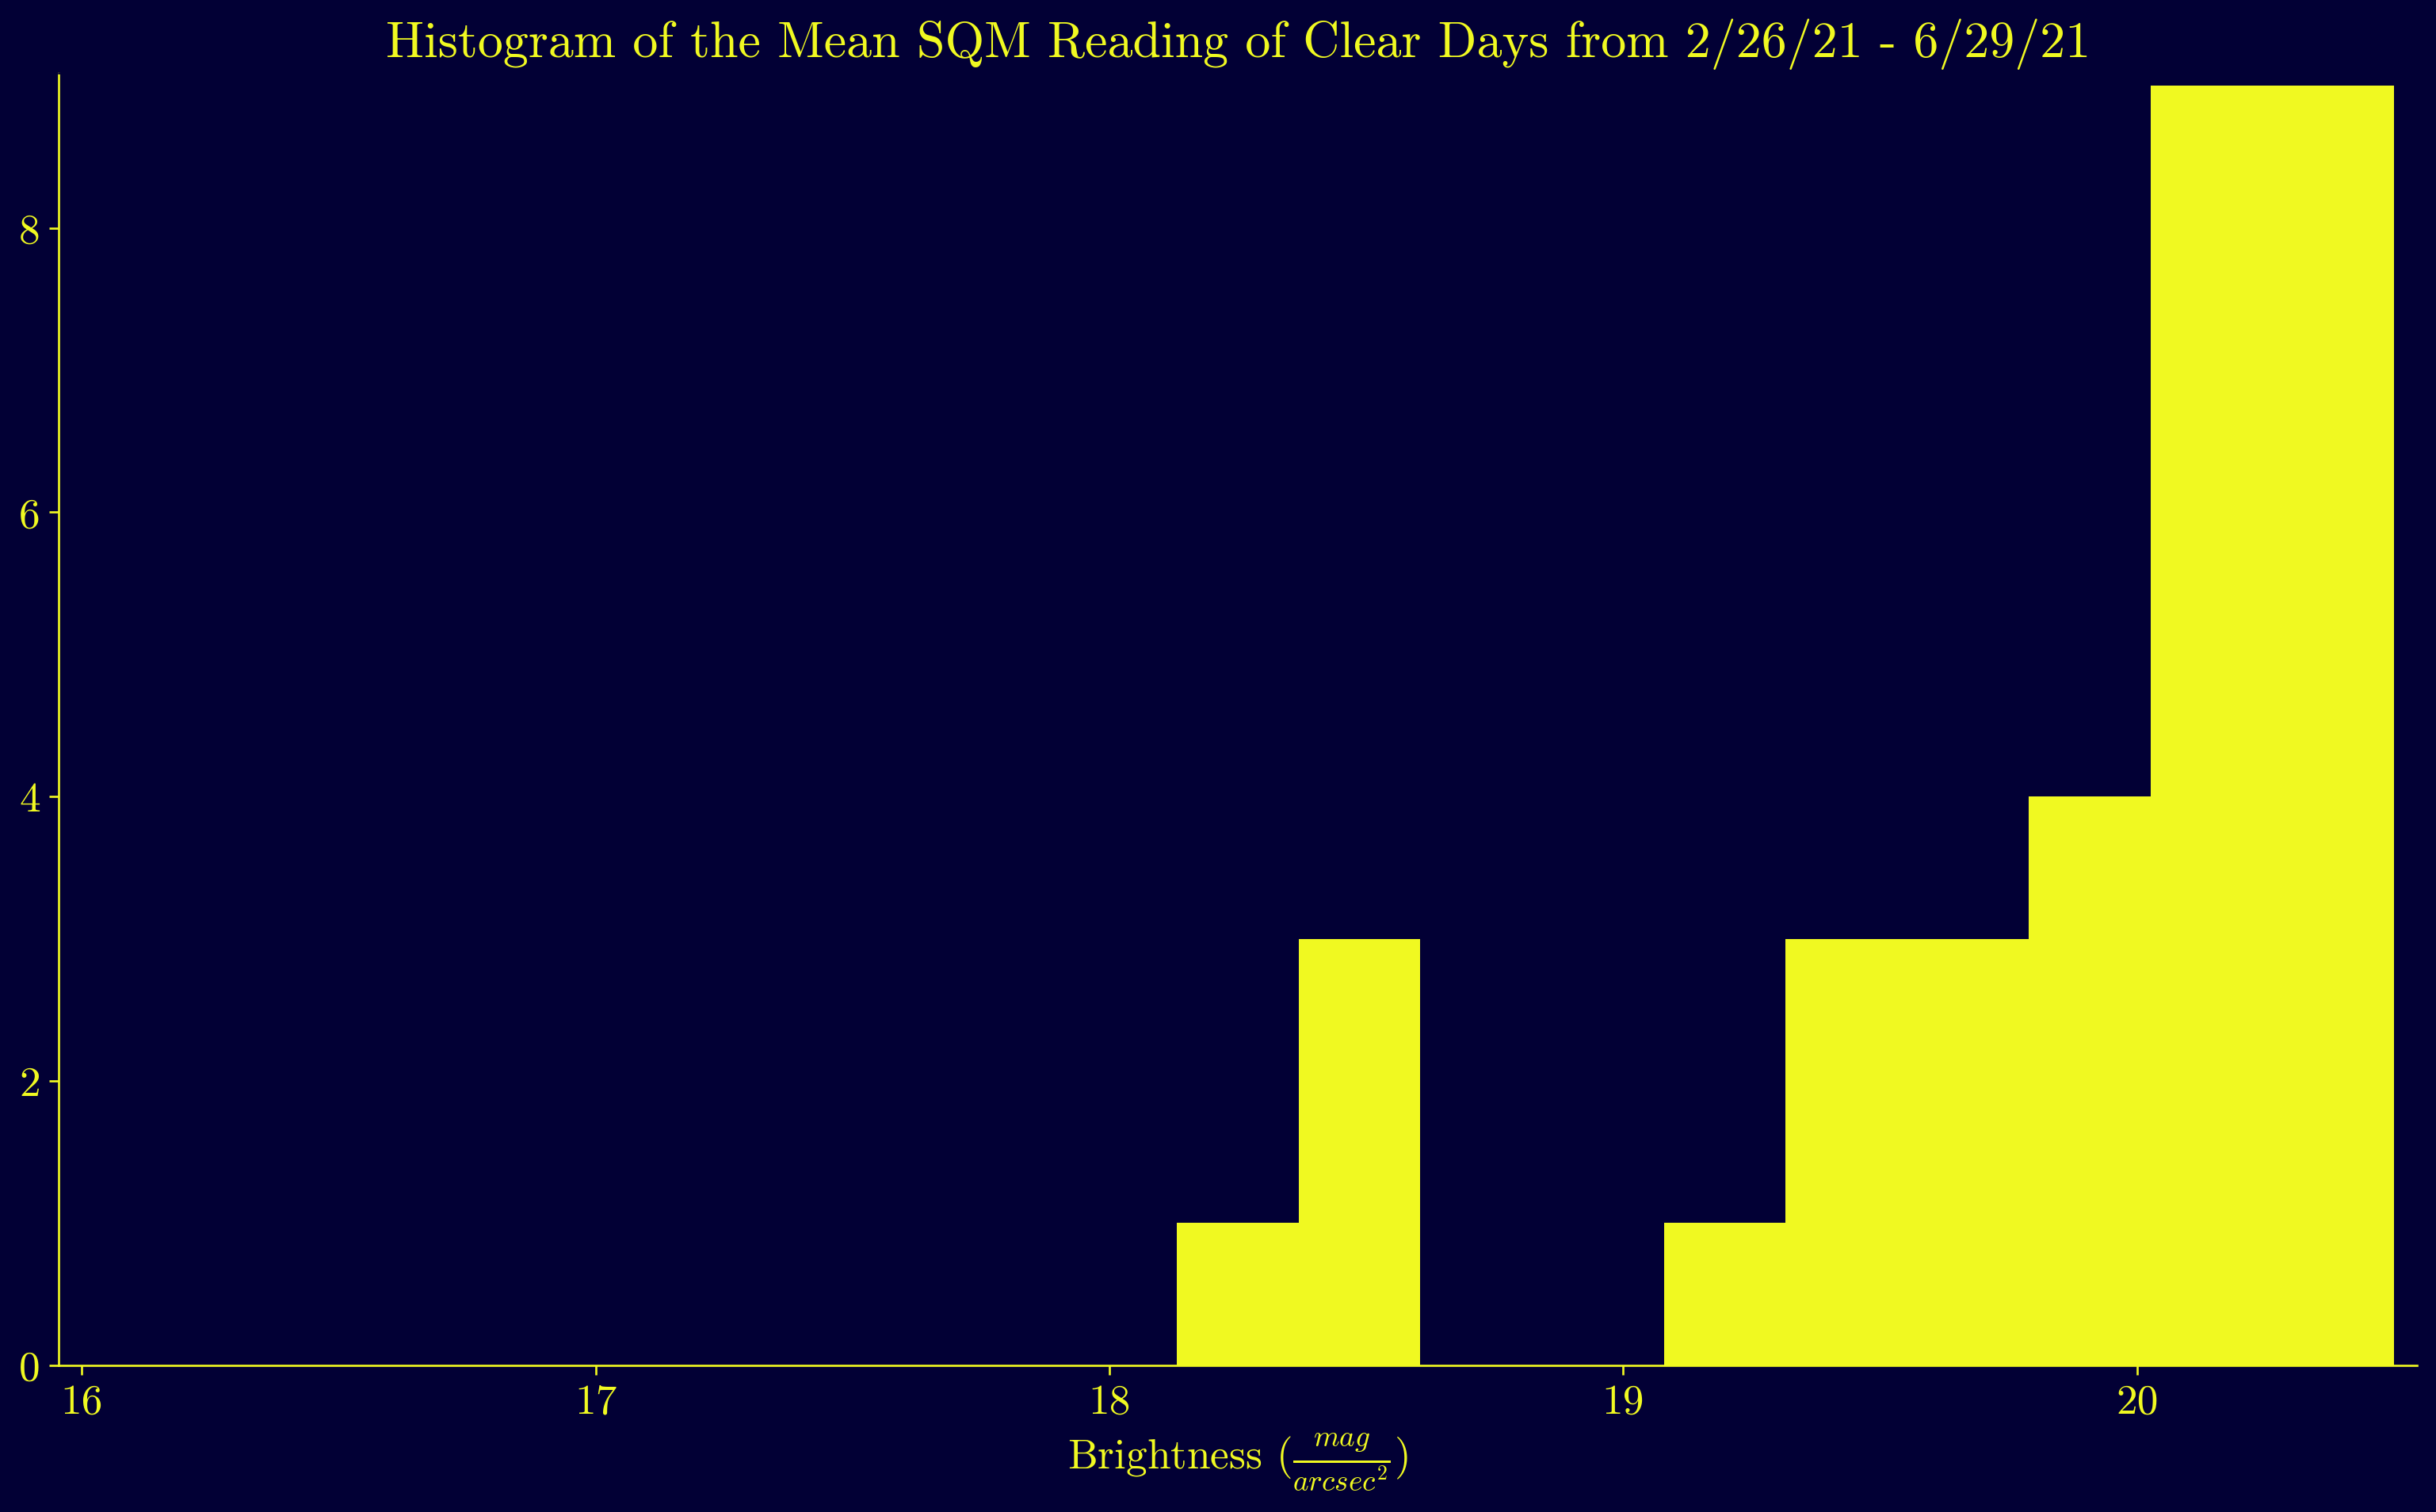

In [256]:
fig = plt.figure()  # sets up a figure
ax = plt.subplot()  # sets up a subplot
plt.rc("axes", unicode_minus=False)  # negative x-axis values plot correctly
fig.patch.set_facecolor("xkcd:midnight blue")  # sets the axis background color

plt.xlabel(r"Brightness ($\frac{mag}{arcsec^2}$)")  # sets the x-label
plt.title(
    "Histogram of the Mean SQM Reading of Clear Days from 2/26/21 - 6/29/21",
    color=colors[len(magsbyday) - 1],
)
# plots the title
ax.set_facecolor("xkcd:midnight blue")  # sets the graph background color
ax.xaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-axis label color
ax.yaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-axis label color
ax.tick_params(
    axis="x", colors=colors[len(magsbyday) - 1]
)  # sets the x-axis ticks color
ax.tick_params(
    axis="y", colors=colors[len(magsbyday) - 1]
)  # sets the y-axis ticks color
ax.spines["left"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-dimension color (left)
ax.spines["bottom"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-dimension color (bottom)
ax.spines["top"].set_color(
    "xkcd:midnight blue"
)  # sets the y-dimension color (top)
ax.spines["right"].set_color(
    "xkcd:midnight blue"
)  # sets the x-dimension color (right)

plt.margins(0.01)  # sets the margin size to 0.01
# (better for histograms)
mybins = np.linspace(16, 20.5, 20)  # creates a list to be used as bin indexes
plt.hist(
    newclearmedians, bins=mybins, color=colors[len(magsbyday) - 1]
)  # plots the histogram

plt.show()  # shows the plot
# fig.savefig('MinusCHistogram', dpi=240, facecolor=fig.get_facecolor())     #uncomment line to save the image

In [259]:
print(np.median(newclearmedians))  # prints median of the newclearmeans

20.13


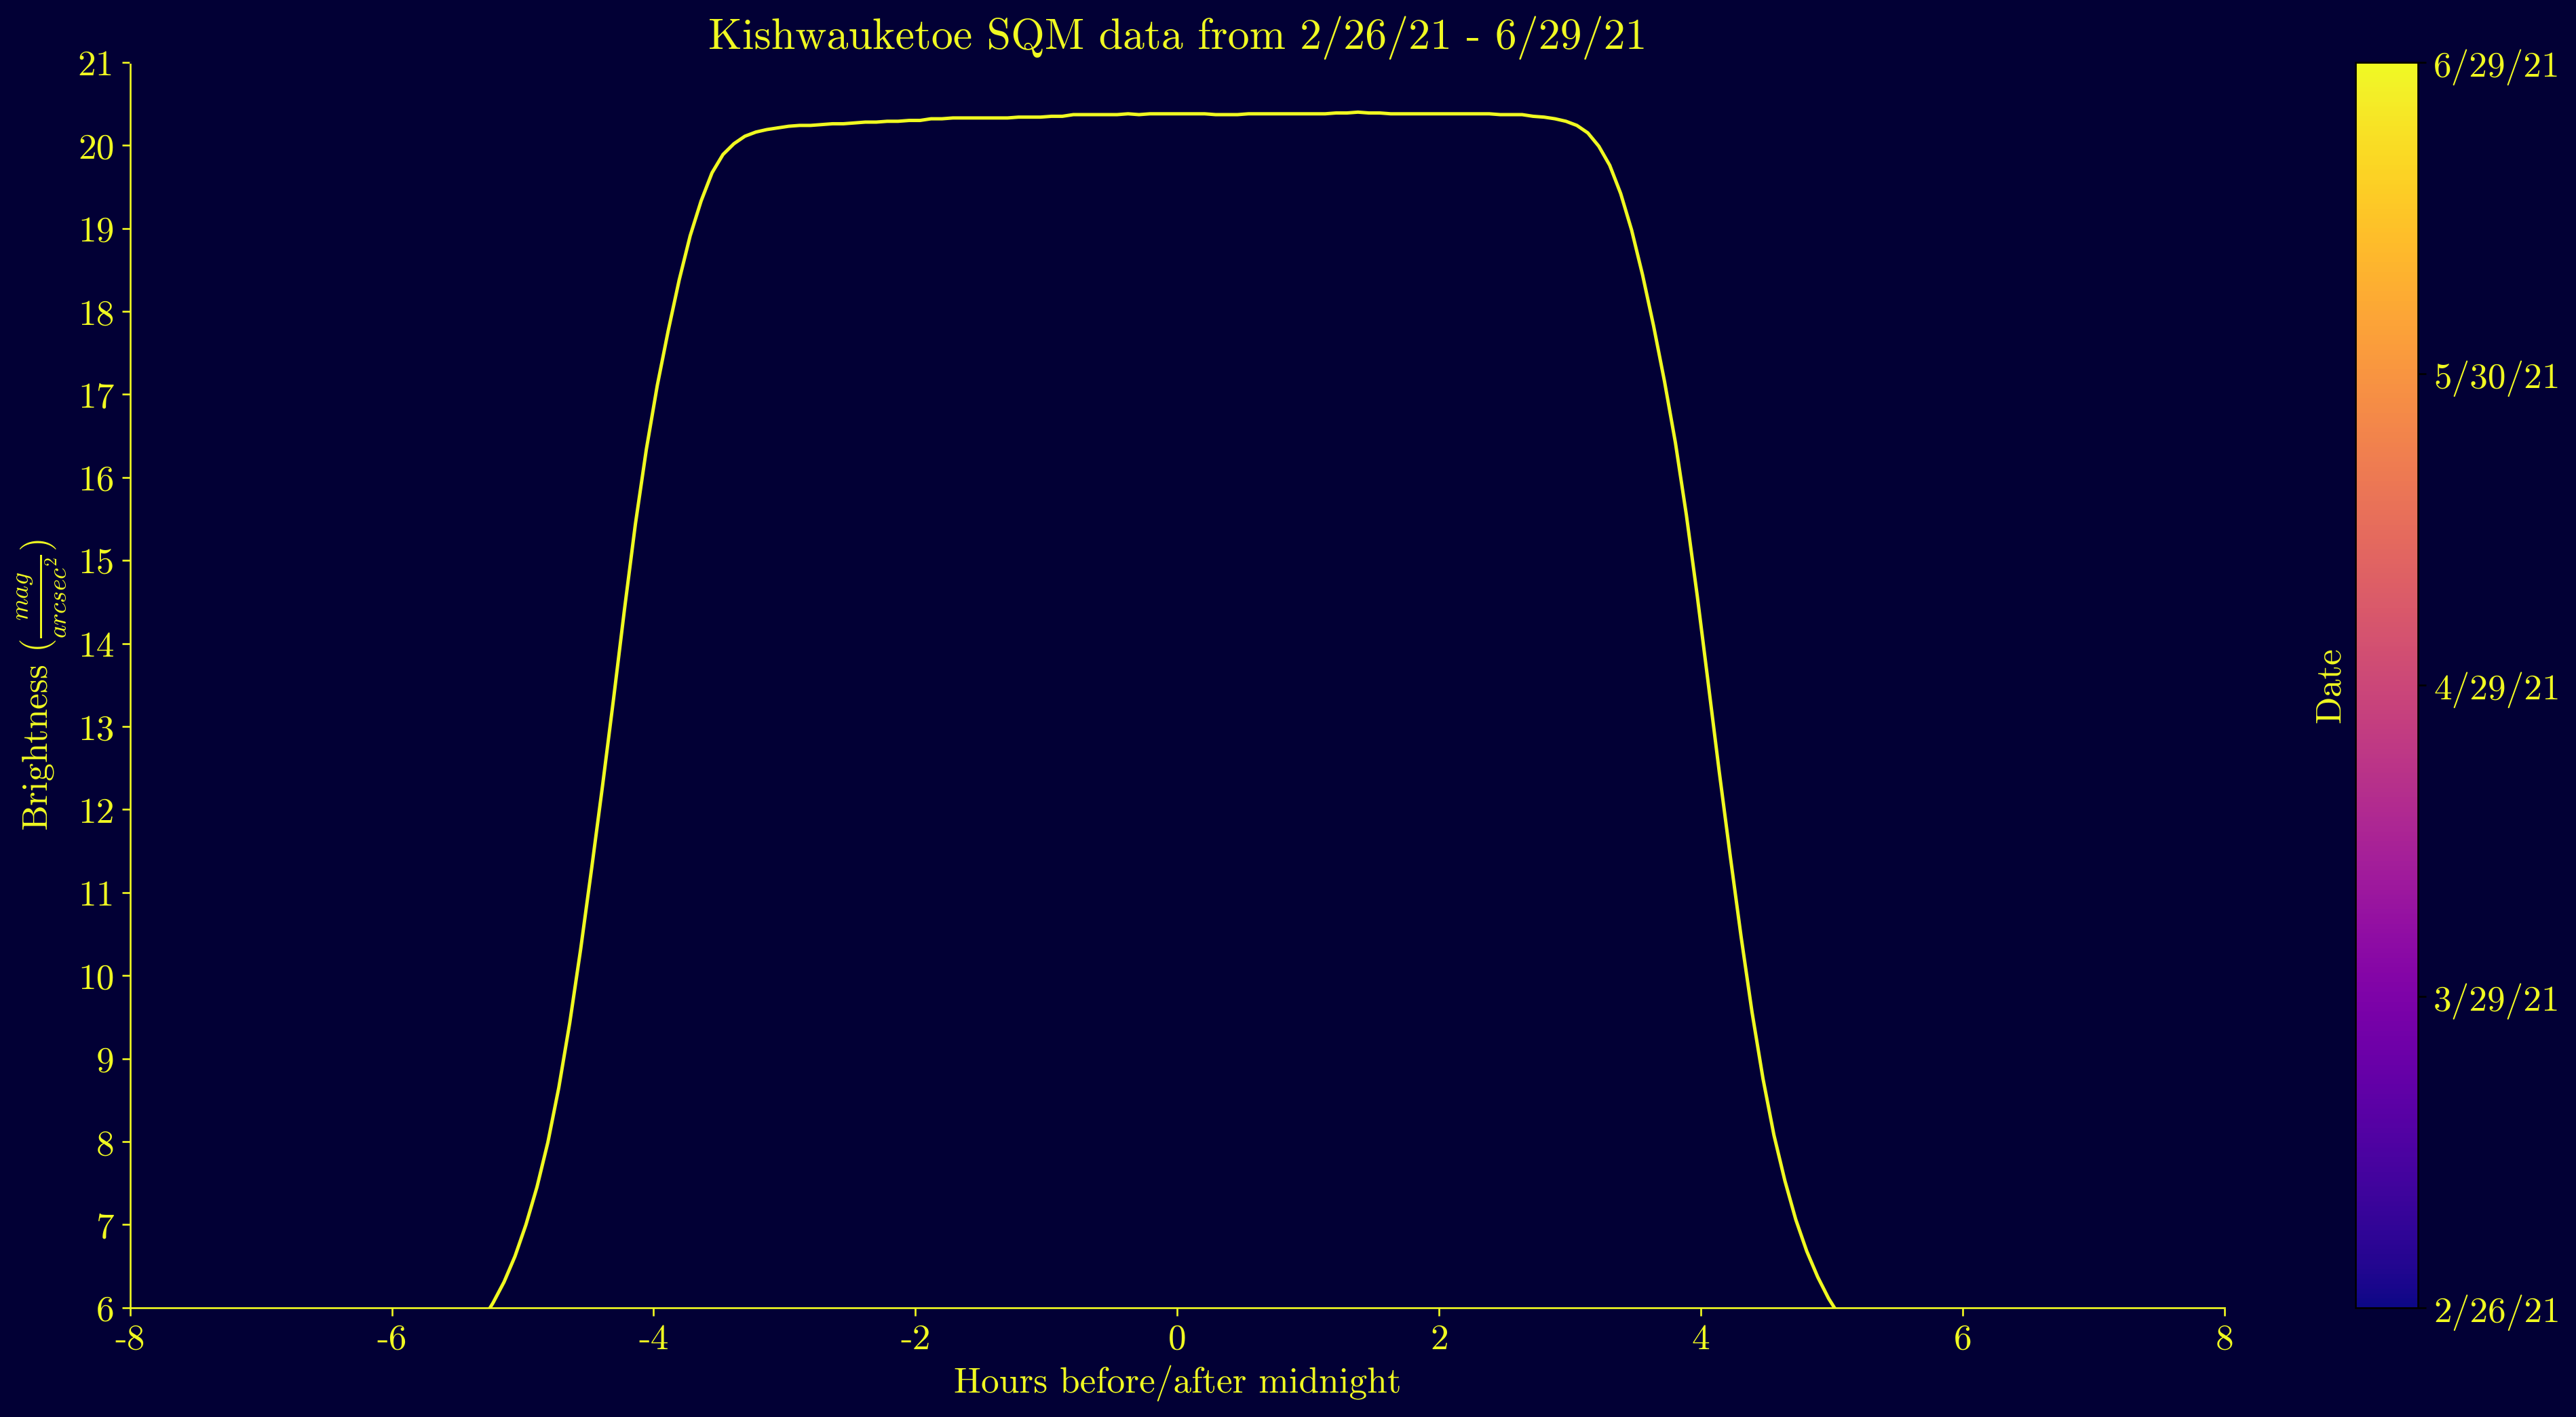

In [48]:
fig = plt.figure()  # sets up a figure
ax = plt.subplot()  # sets up a subplot
plt.rc("axes", unicode_minus=False)  # negative x-axis values plot correctly
fig.set_facecolor("xkcd:midnight blue")  # sets the axis background color
colors = plt.cm.plasma(
    np.linspace(0, 1, len(magsbyday))
)  # creates a colorspace for the lines/bar

plt.title(
    "Kishwauketoe SQM data from 2/26/21 - 6/29/21",
    color=colors[len(magsbyday) - 1],
)  # plots title

plt.xticks(
    [-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12]
)  # plots the x-axis ticks
plt.yticks([i for i in range(0, 22)])  # plots the y-axis ticks
plt.xlabel("Hours before/after midnight")  # plots the x-axis label
plt.ylabel(r"Brightness ($\frac{mag}{arcsec^2}$)")  # plots the y-axis label

ax.set_facecolor("xkcd:midnight blue")  # sets the graph background color
ax.xaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-axis label color
ax.yaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-axis label color
ax.tick_params(
    axis="x", colors=colors[len(magsbyday) - 1]
)  # sets the x-axis ticks color
ax.tick_params(
    axis="y", colors=colors[len(magsbyday) - 1]
)  # sets the y-axis ticks color
ax.spines["left"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-dimension color (left)
ax.spines["bottom"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-dimension color (bottom)
ax.spines["top"].set_color(
    "xkcd:midnight blue"
)  # sets the y-dimension color (top)
ax.spines["right"].set_color(
    "xkcd:midnight blue"
)  # sets the x-dimension color (right)

plt.ylim(6, 21)  # only plots y-values between (val,val)
plt.xlim((-8, 8))  # only plots x-values between (val,val)
plt.margins(0)  # sets the label/axis/ticks/etc margin to 0

colorbar = fig.colorbar(
    cm.ScalarMappable(cmap=cm.plasma), ticks=np.linspace(0, 1, 5), label="Date"
)  # plots colorbar
datelist = [
    "2/26/21",
    "3/29/21",
    "4/29/21",
    "5/30/21",
    "6/29/21",
]  # creates a list of dates for the colorbar
colorbar.ax.set_yticklabels(
    datelist, color=colors[len(magsbyday) - 1]
)  # plots the colorbar ticks with specific color
colorbar.ax.yaxis.label.set_color(
    color=colors[len(magsbyday) - 1]
)  # sets the colorbar label color
colorbar.ax.yaxis.set_label_position("left")  # sets the colorbar label position

plt.subplots_adjust(right=1.06)  # formatting so that the final rendered
plt.subplots_adjust(left=0.055)  # image has equal spacing between the text
plt.subplots_adjust(top=0.935)  # and sides of the image. Overall looks
plt.subplots_adjust(
    bottom=0.085
)  # nicer than default. Fiddle with at own risk.

plt.plot(
    np.linspace(-12, 12, 288), magsbyday[75], color=colors[i]
)  # plots a specific day of data

plt.show()
# fig.savefig('Flawless', dpi=240, facecolor=fig.get_facecolor())            #uncomment line if you want to save the image

In [49]:
indicies = []  # testing cell that was used to find
for i in range(
    len(weatherdatameansbool)
):  # the specific indices of cleardata days
    if weatherdatameansbool[i] == True:
        indicies.append(i)

# print(indicies)
# print(weatherdatabyday[13])

In [50]:
gooddays = [
    8,
    21,
    45,
    49,
    74,
    75,
    76,
    96,
    98,
    109,
    110,
]  # Ten best days from the "cleardays"
perfectrio = [74, 75, 76]  # Three perfect days during a new moon

In [51]:
goodmaxes = []  # sets up lists for good days
goodmins = []
goodmeans = []
goodmedians = []
for i in gooddays:  # loops through the good days and calculates
    goodmaxes.append(max(magsbydayspliced[i]))  # the given value
    goodmins.append(min(magsbydayspliced[i]))
    goodmeans.append(np.mean(magsbydayspliced[i]))  # appends to original list
    goodmedians.append(np.median(magsbydayspliced[i]))

In [52]:
perfectmaxes = []  # does the same thing as the previous cell
perfectmins = []  # but with the three perfect days
perfectmeans = []
perfectmedians = []
for i in perfectrio:
    perfectmaxes.append(max(magsbydayspliced[i]))
    perfectmins.append(min(magsbydayspliced[i]))
    perfectmeans.append(np.mean(magsbydayspliced[i]))
    perfectmedians.append(np.median(magsbydayspliced[i]))

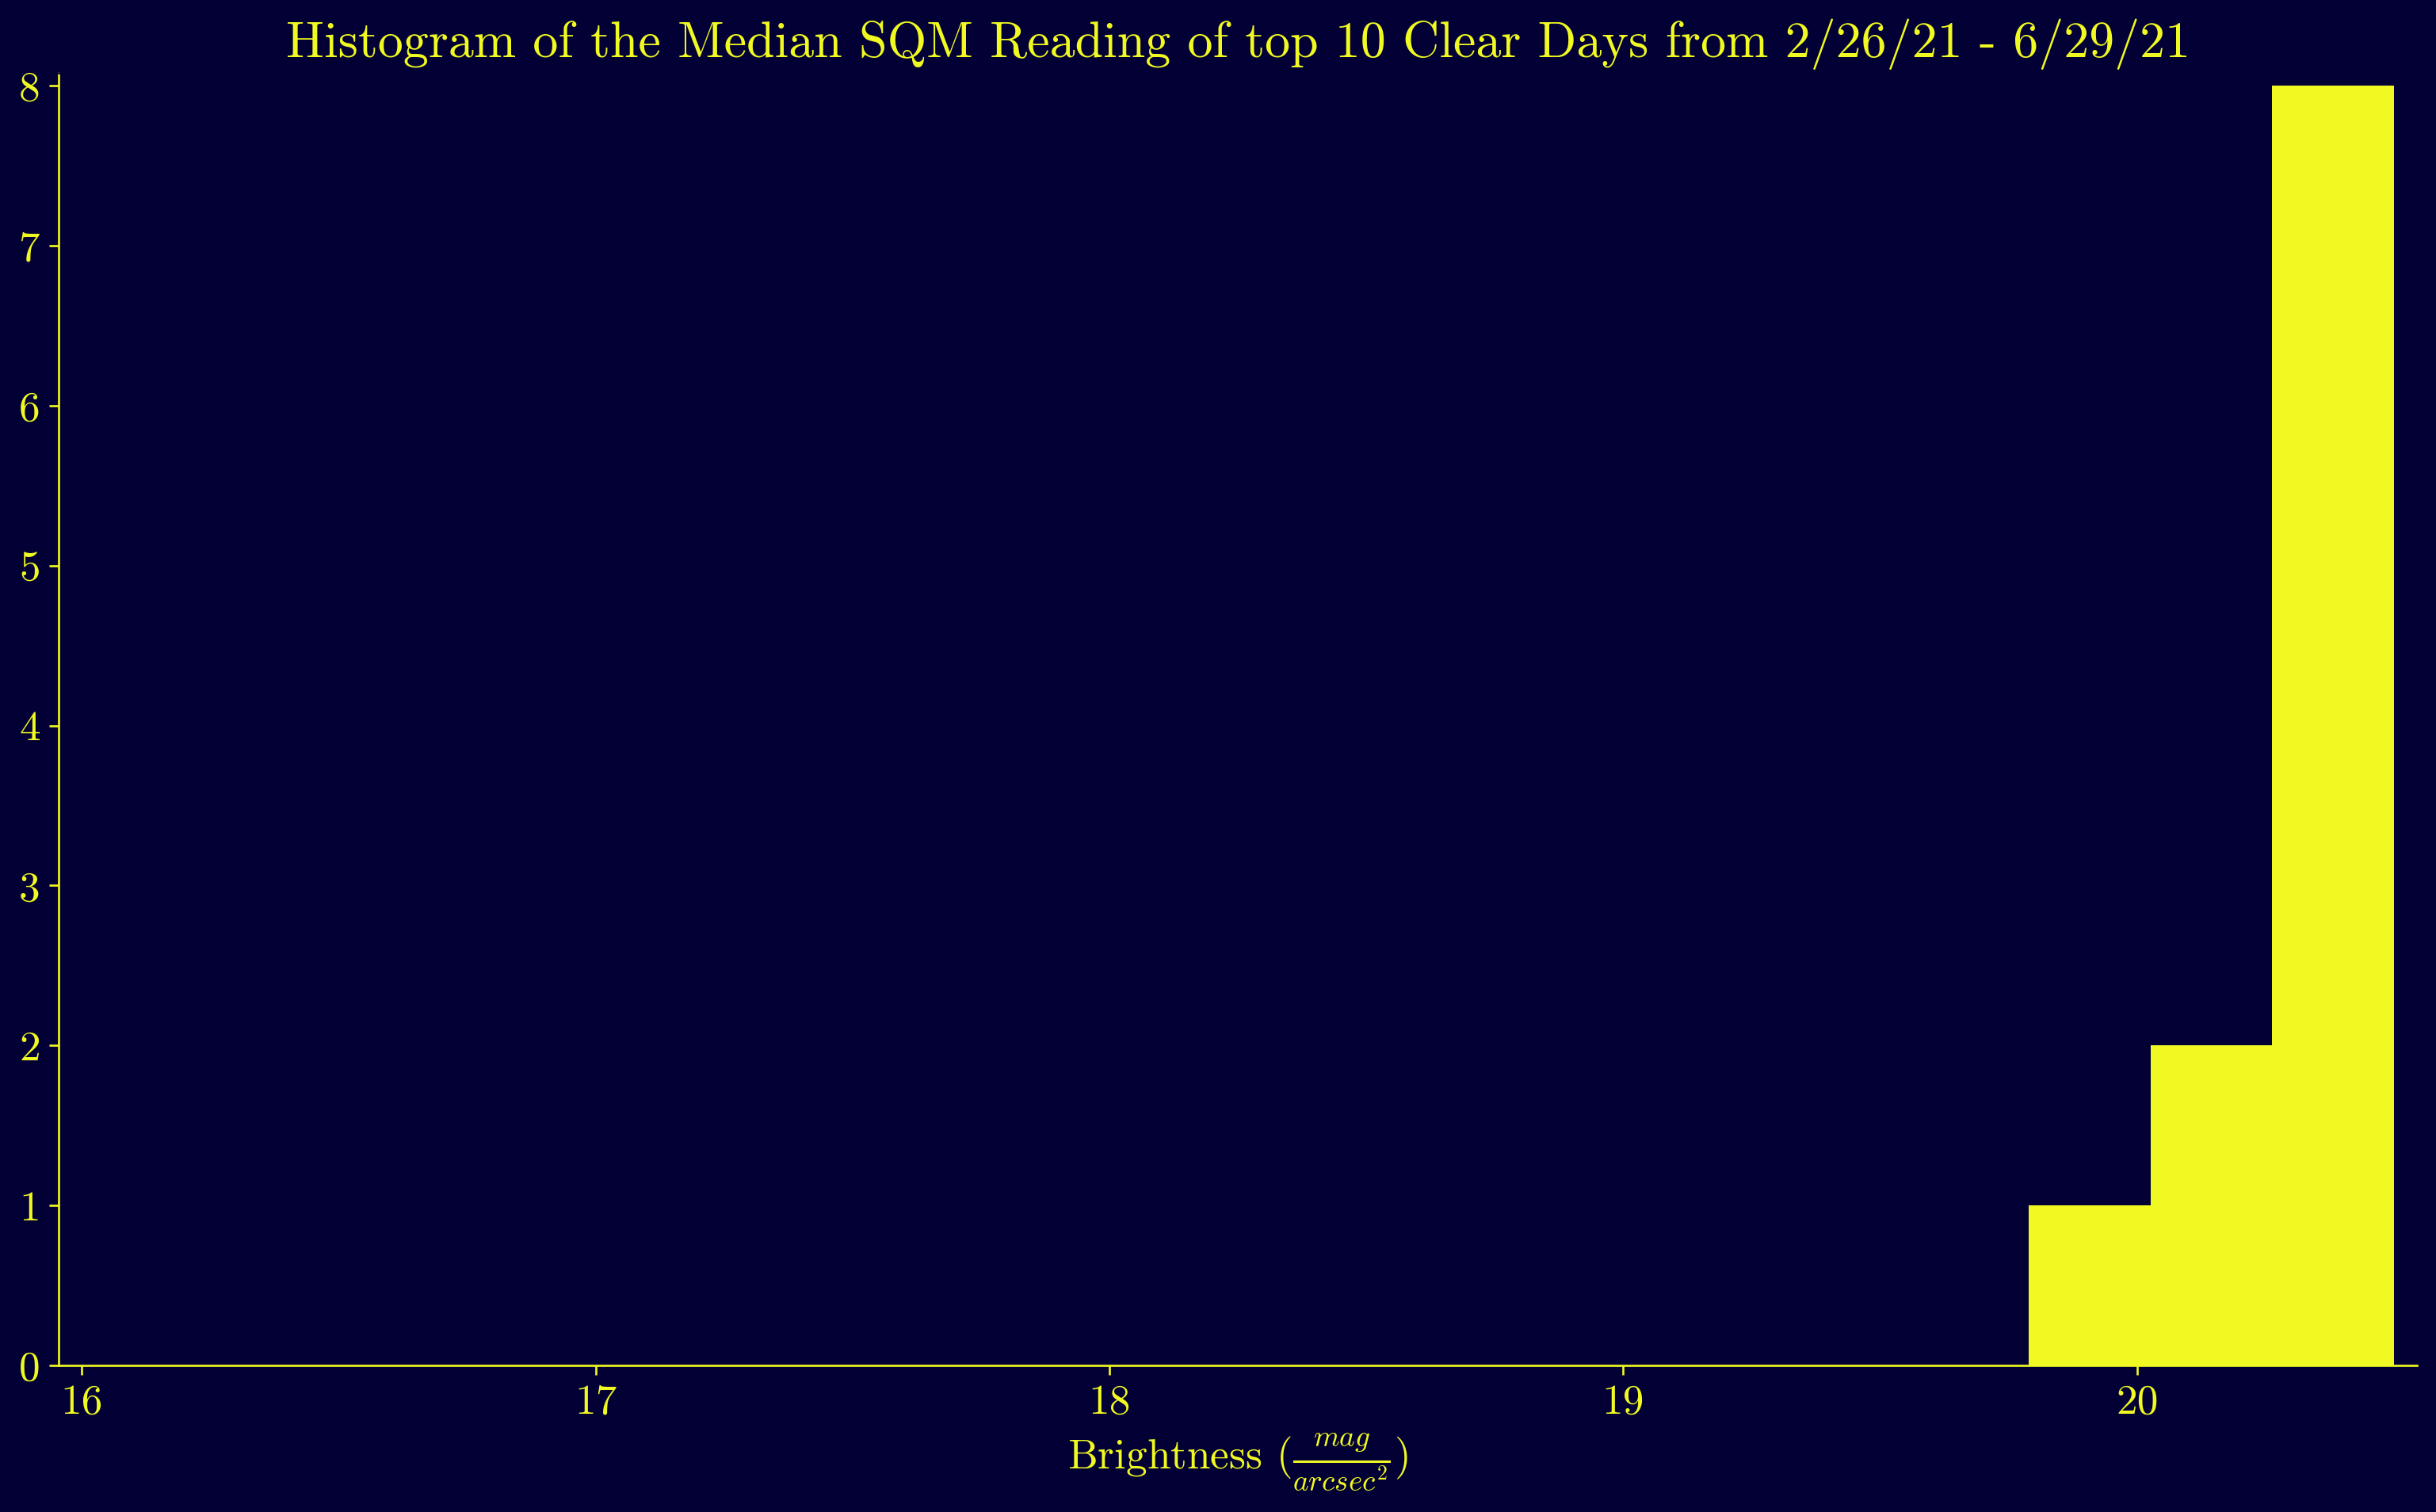

In [267]:
fig = plt.figure()  # sets up a figure
ax = plt.subplot()  # sets up a subplot
plt.rc("axes", unicode_minus=False)  # negative x-axis values plot correctly
fig.patch.set_facecolor("xkcd:midnight blue")  # sets the axis background color

plt.xlabel(r"Brightness ($\frac{mag}{arcsec^2}$)")  # sets the x-label
plt.title(
    "Histogram of the Median SQM Reading of top 10 Clear Days from 2/26/21 - 6/29/21",
    color=colors[len(magsbyday) - 1],
)
# plots the title
ax.set_facecolor("xkcd:midnight blue")  # sets the graph background color
ax.xaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-axis label color
ax.yaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-axis label color
ax.tick_params(
    axis="x", colors=colors[len(magsbyday) - 1]
)  # sets the x-axis ticks color
ax.tick_params(
    axis="y", colors=colors[len(magsbyday) - 1]
)  # sets the y-axis ticks color
ax.spines["left"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-dimension color (left)
ax.spines["bottom"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-dimension color (bottom)
ax.spines["top"].set_color(
    "xkcd:midnight blue"
)  # sets the y-dimension color (top)
ax.spines["right"].set_color(
    "xkcd:midnight blue"
)  # sets the x-dimension color (right)

plt.margins(0.01)  # sets the margin size to 0.01
# (better for histograms)
mybins = np.linspace(16, 20.5, 20)  # creates a list to be used as bin indexes
plt.hist(
    goodmedians, bins=mybins, color=colors[len(magsbyday) - 1]
)  # plots the histogram

plt.show()  # shows the plot
# fig.savefig('Good10Histogram', dpi=240, facecolor=fig.get_facecolor())     #uncomment line to save the image

In [268]:
print(np.median(goodmedians))  # prints median of the good days

20.34


In [271]:
print(np.median(perfectmedians))  # prints median of the perfect days

20.38


In [202]:
xvalshist = []  # initializes empty arrays for histogram data
yvalshist = []
for i in range(len(magsbyday)):  # loops through every day
    for j in range(49):  # takes only 4 hours worth of data
        xvalshist.append(j)  # appends 0-287 [days] times in a 1D list (xvals)
        yvalshist.append(
            magsbyday[i][120 + j]
        )  # appends central 4 hours to a 1D list (yvals)

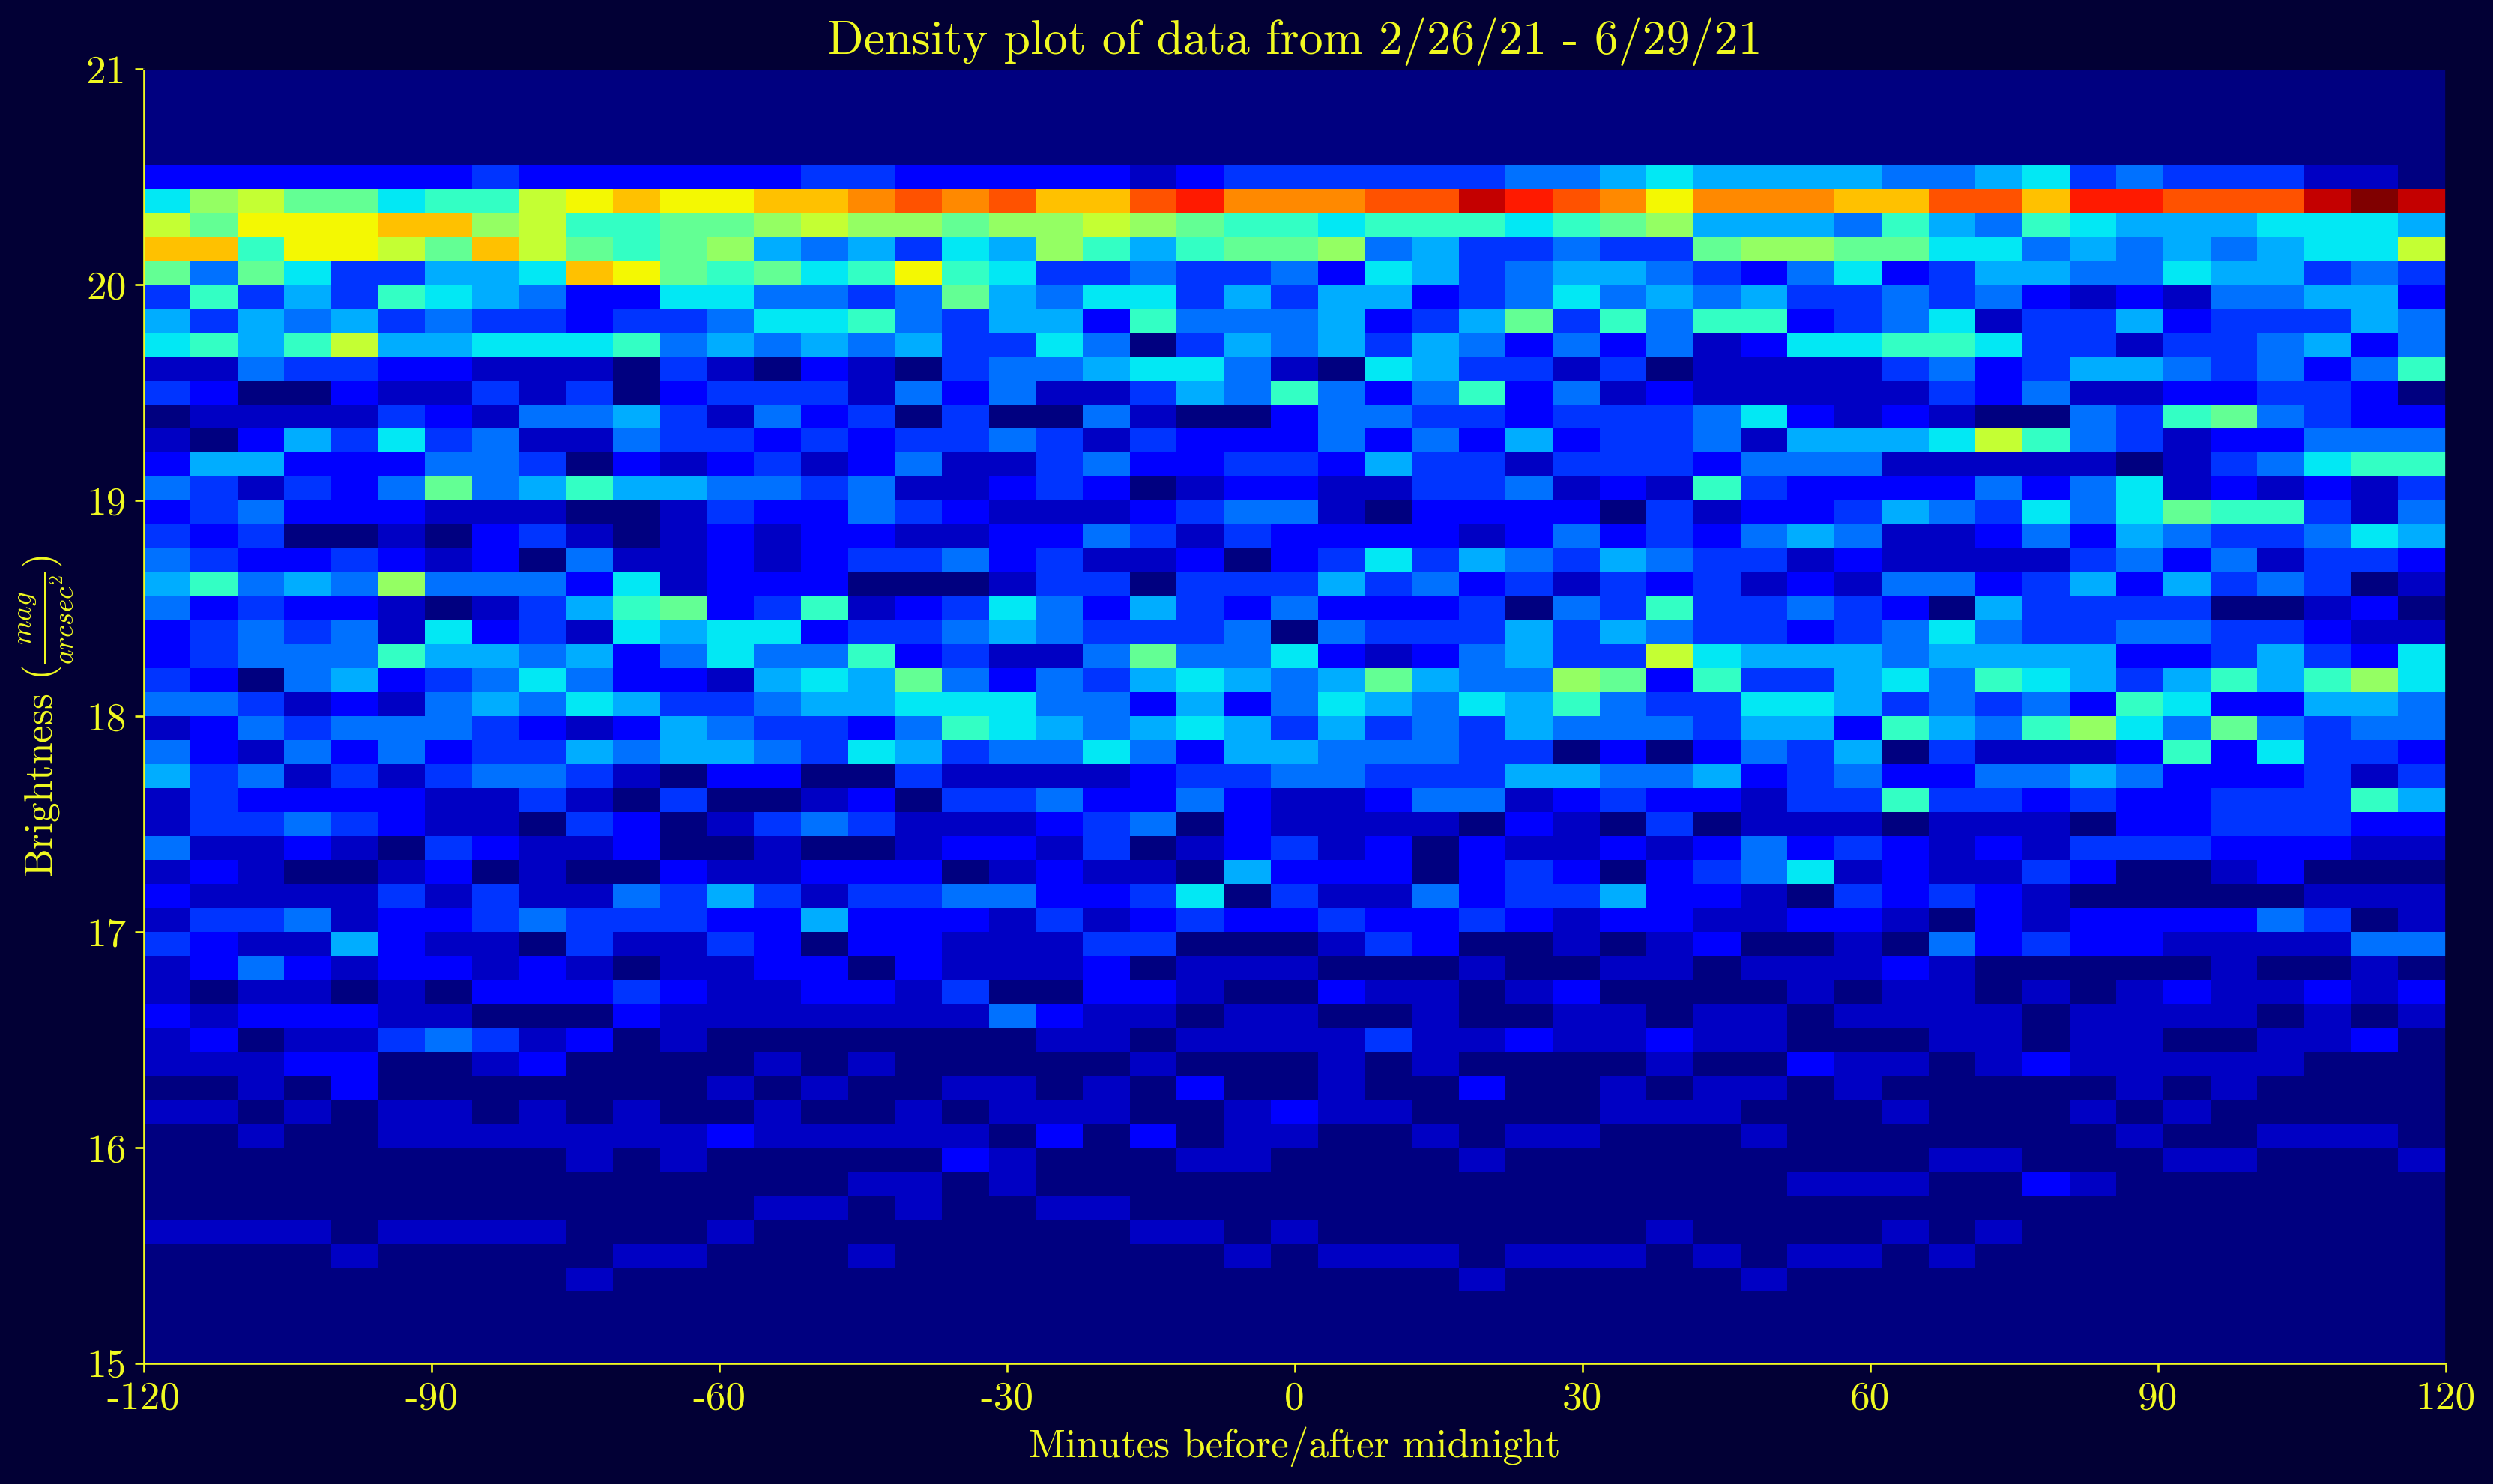

In [285]:
fig = plt.figure()  # sets up a figure
ax = plt.subplot()  # sets up a subplot
plt.rc("axes", unicode_minus=False)  # negative x-axis values plot correctly
fig.set_facecolor("xkcd:midnight blue")  # sets the axis background color

plt.title(
    "Density plot of data from 2/26/21 - 6/29/21",
    color=colors[len(magsbyday) - 1],
)  # plots title

plt.xticks([0, 6, 12, 18, 24, 30, 36, 42, 48])  # plots the x-axis ticks
ax.set_xticklabels(
    ["-120", "-90", "-60", "-30", "0", "30", "60", "90", "120"]
)  # plots the x-axis tick labels
plt.xlabel("Minutes before/after midnight")  # plots the x-axis label
plt.ylabel(r"Brightness ($\frac{mag}{arcsec^2}$)")  # plots the y-axis label

ax.set_facecolor("xkcd:midnight blue")  # sets the graph background color
ax.xaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-axis label color
ax.yaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-axis label color
ax.tick_params(
    axis="x", colors=colors[len(magsbyday) - 1]
)  # sets the x-axis ticks color
ax.tick_params(
    axis="y", colors=colors[len(magsbyday) - 1]
)  # sets the y-axis ticks color
ax.spines["left"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-dimension color (left)
ax.spines["bottom"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-dimension color (bottom)
ax.spines["top"].set_color(
    "xkcd:midnight blue"
)  # sets the y-dimension color (top)
ax.spines["right"].set_color(
    "xkcd:midnight blue"
)  # sets the x-dimension color (right)

plt.margins(0)  # sets the label/axis/ticks/etc margin to 0
plt.subplots_adjust(right=0.9)  # formatting so that the final rendered
plt.subplots_adjust(left=0.1)  # image has equal spacing between the text
plt.subplots_adjust(top=0.9)  # and sides of the image. Overall looks
plt.subplots_adjust(bottom=0.1)  # nicer than default. Fiddle with at own risk.

plt.hist2d(
    xvalshist,
    yvalshist,
    bins=(49, 54),
    range=[[0, 48], [15, 21]],
    cmap=plt.cm.jet,
)  # plots the 2D histogram

plt.show()  # shows the plot
fig.savefig(
    "2DAllHistogram", dpi=240, facecolor=fig.get_facecolor()
)  # uncomment line to save the image

In [204]:
clearxvalshist = []  # initializes empty arrays for histogram data
clearyvalshist = []
for i in range(len(cleardays)):  # does the same thing as last time except
    for j in range(49):  # just for the clear day data
        clearxvalshist.append(j)
        clearyvalshist.append(cleardays[i][120 + j])

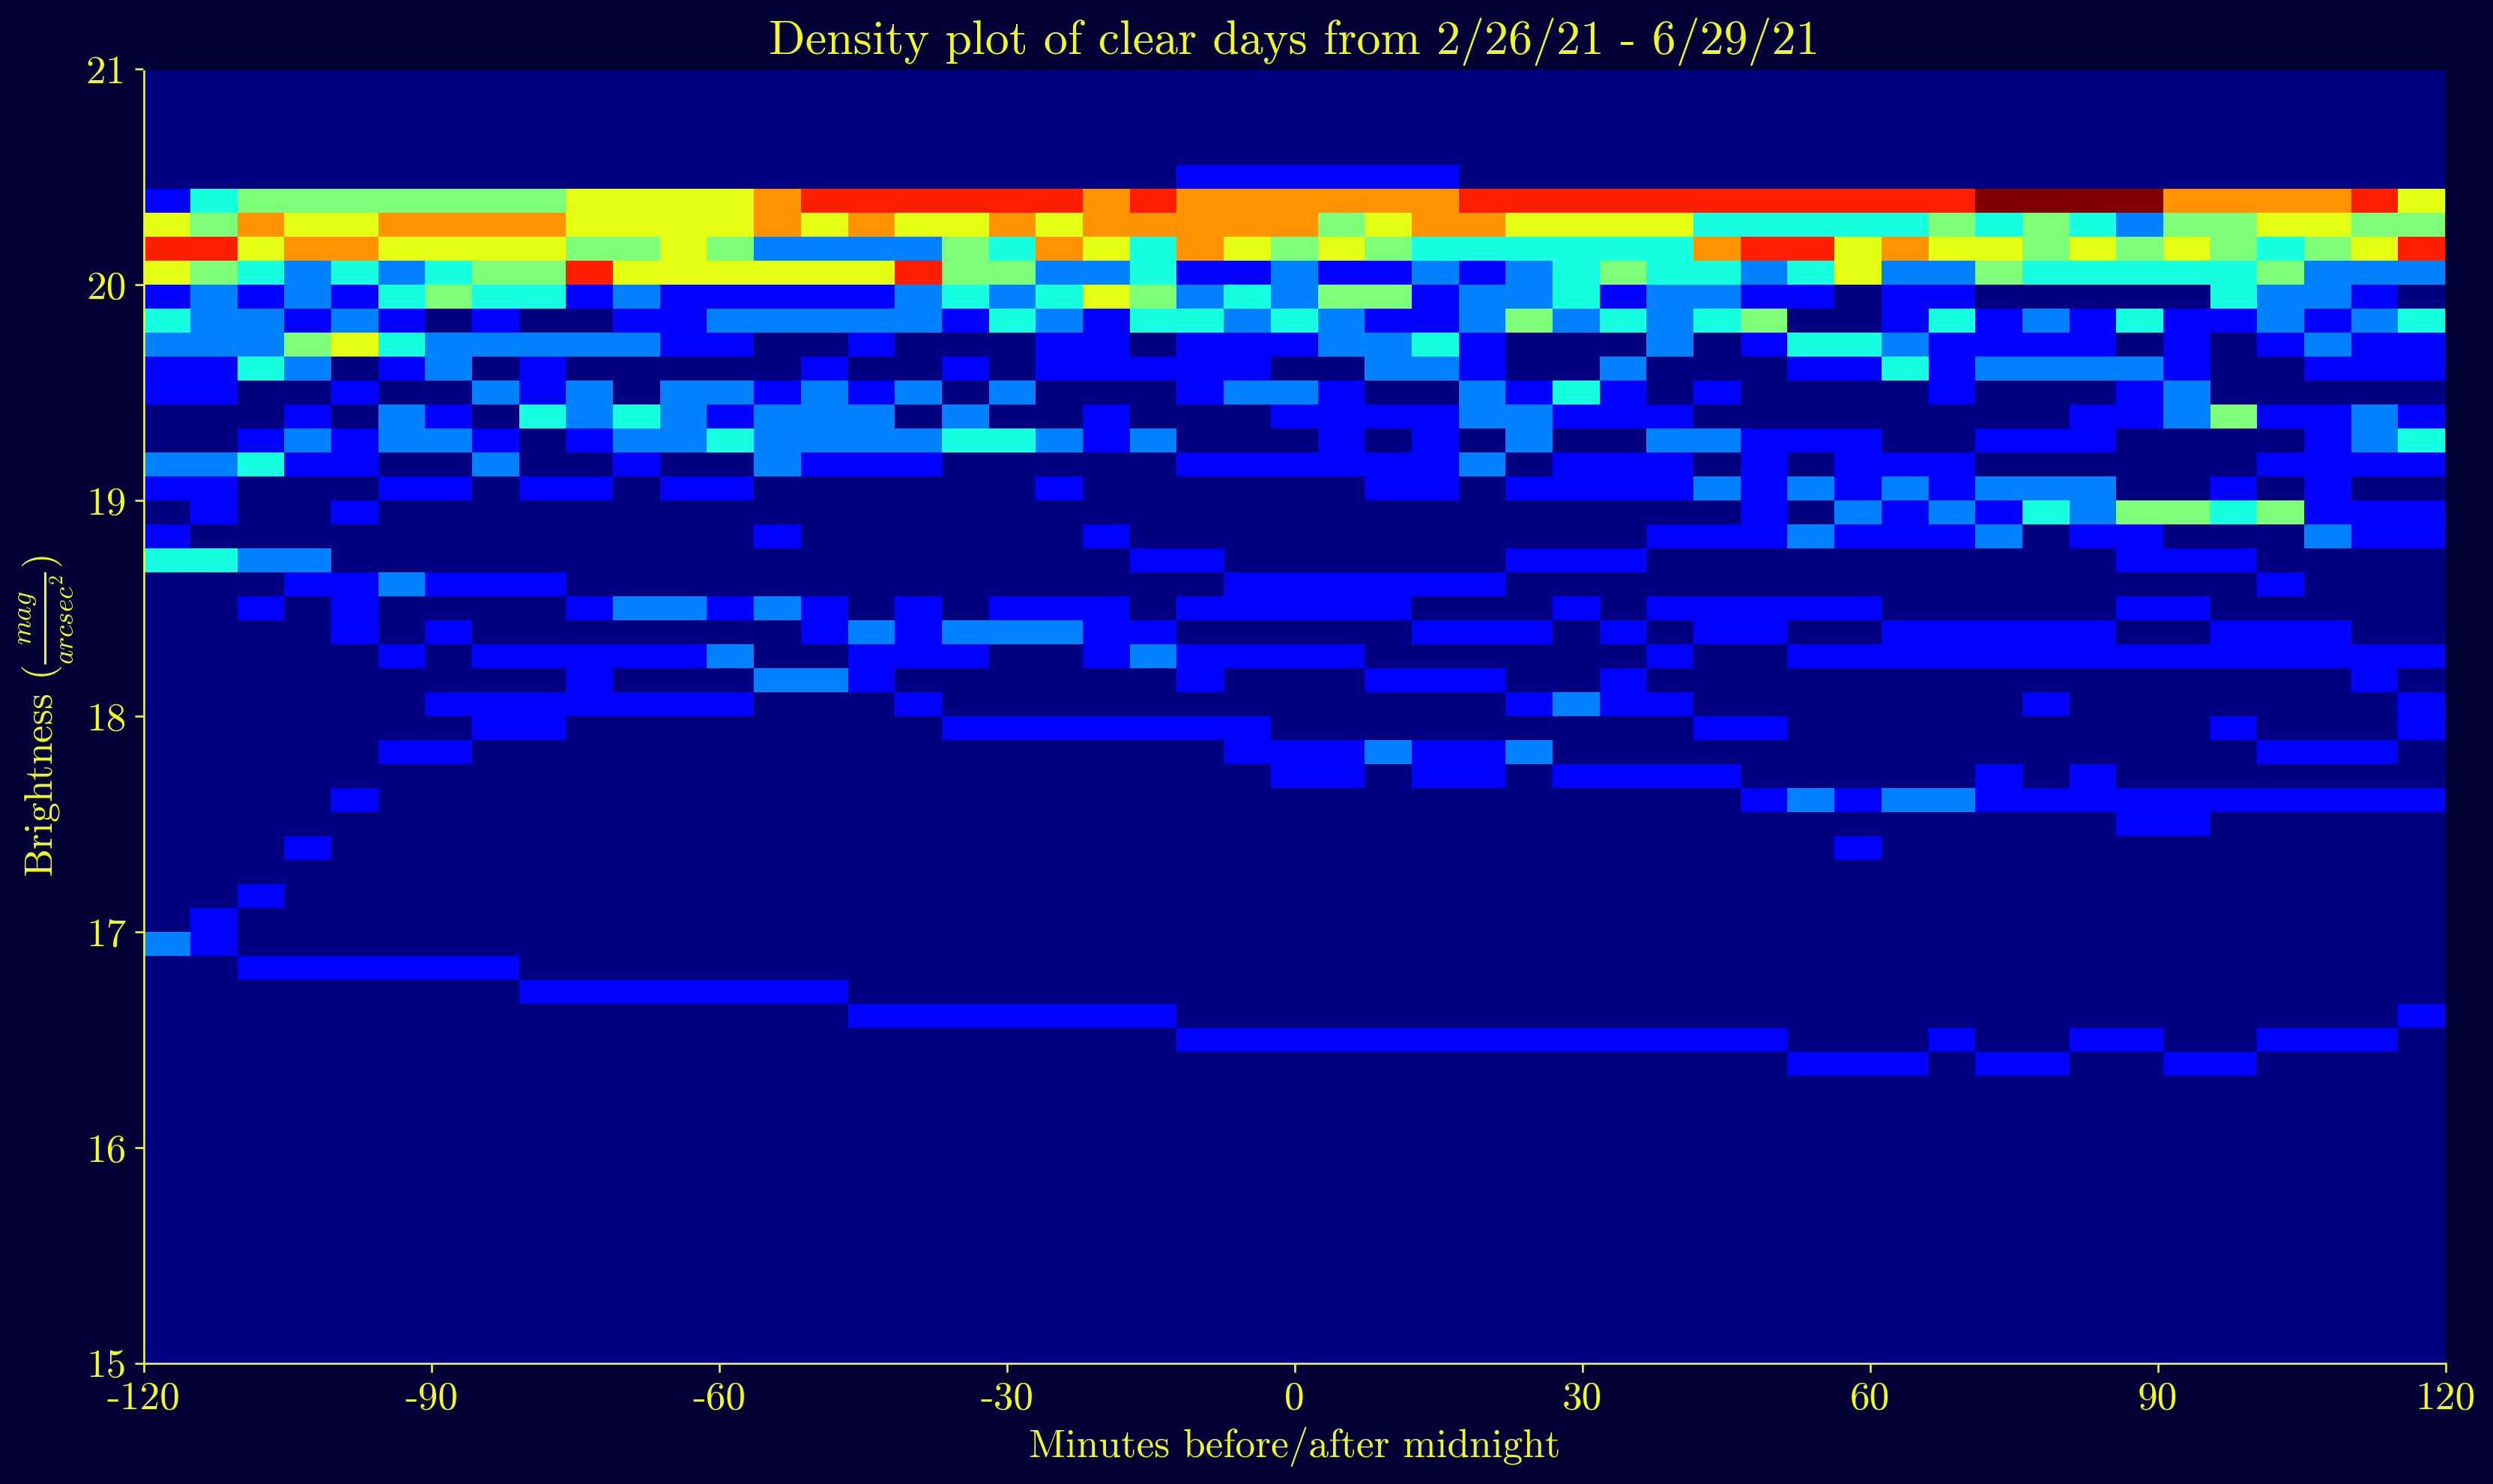

In [286]:
fig = plt.figure()  # sets up a figure
ax = plt.subplot()  # sets up a subplot
plt.rc("axes", unicode_minus=False)  # negative x-axis values plot correctly
fig.set_facecolor("xkcd:midnight blue")  # sets the axis background color

plt.title(
    "Density plot of clear days from 2/26/21 - 6/29/21",
    color=colors[len(magsbyday) - 1],
)  # plots title

plt.xticks([0, 6, 12, 18, 24, 30, 36, 42, 48])  # plots the x-axis ticks
ax.set_xticklabels(
    ["-120", "-90", "-60", "-30", "0", "30", "60", "90", "120"]
)  # plots the x-axis tick labels
plt.xlabel("Minutes before/after midnight")  # plots the x-axis label
plt.ylabel(r"Brightness ($\frac{mag}{arcsec^2}$)")  # plots the y-axis label

ax.set_facecolor("xkcd:midnight blue")  # sets the graph background color
ax.xaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-axis label color
ax.yaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-axis label color
ax.tick_params(
    axis="x", colors=colors[len(magsbyday) - 1]
)  # sets the x-axis ticks color
ax.tick_params(
    axis="y", colors=colors[len(magsbyday) - 1]
)  # sets the y-axis ticks color
ax.spines["left"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-dimension color (left)
ax.spines["bottom"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-dimension color (bottom)
ax.spines["top"].set_color(
    "xkcd:midnight blue"
)  # sets the y-dimension color (top)
ax.spines["right"].set_color(
    "xkcd:midnight blue"
)  # sets the x-dimension color (right)

plt.margins(0)  # sets the label/axis/ticks/etc margin to 0
plt.subplots_adjust(right=0.9)  # formatting so that the final rendered
plt.subplots_adjust(left=0.1)  # image has equal spacing between the text
plt.subplots_adjust(top=0.9)  # and sides of the image. Overall looks
plt.subplots_adjust(bottom=0.1)  # nicer than default. Fiddle with at own risk.

plt.hist2d(
    clearxvalshist,
    clearyvalshist,
    bins=(49, 54),
    range=[[0, 48], [15, 21]],
    cmap=plt.cm.jet,
)  # plots the 2D histogram

plt.show()  # shows the plot
fig.savefig(
    "2DClearHistogram", dpi=240, facecolor=fig.get_facecolor()
)  # uncomment line to save the image

In [288]:
goodxvalshist = []  # initializes empty arrays for histogram data
goodyvalshist = []
for i in gooddays:  # does the same thing as last time except
    for j in range(49):  # just for the best 10 days' data
        goodxvalshist.append(j)
        goodyvalshist.append(magsbyday[i][120 + j])

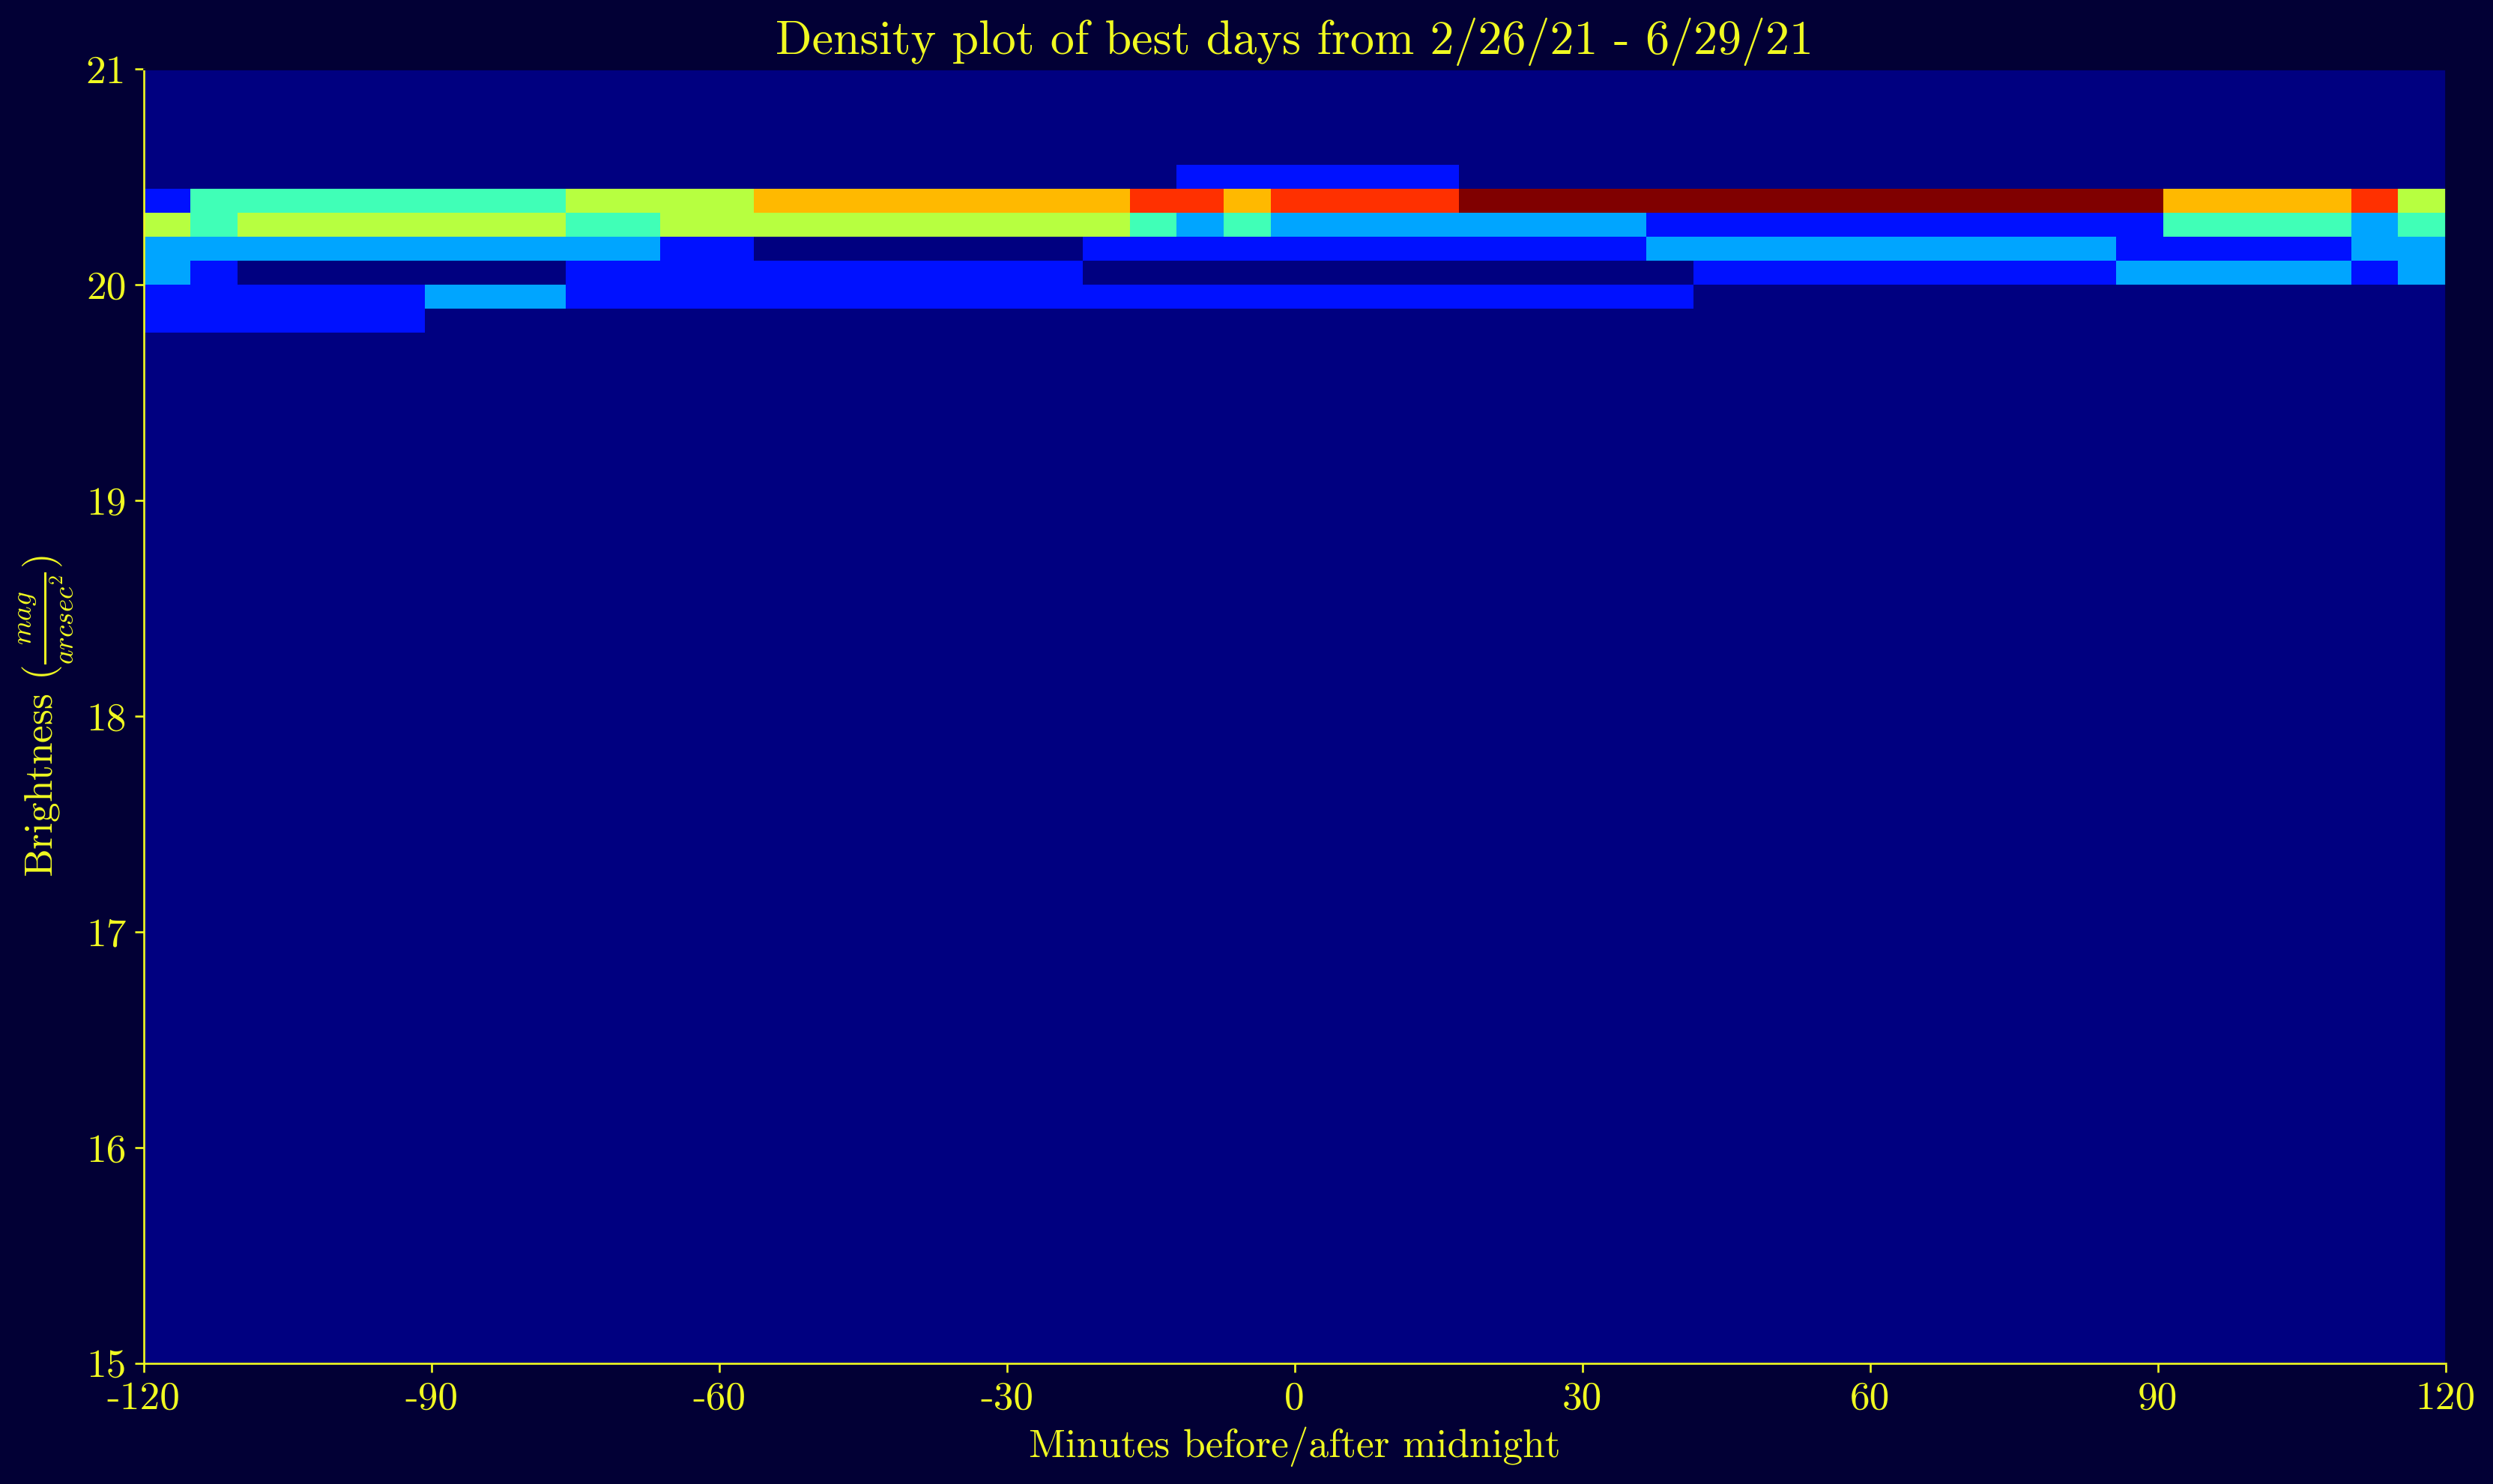

In [289]:
fig = plt.figure()  # sets up a figure
ax = plt.subplot()  # sets up a subplot
plt.rc("axes", unicode_minus=False)  # negative x-axis values plot correctly
fig.set_facecolor("xkcd:midnight blue")  # sets the axis background color

plt.title(
    "Density plot of best days from 2/26/21 - 6/29/21",
    color=colors[len(magsbyday) - 1],
)  # plots title

plt.xticks([0, 6, 12, 18, 24, 30, 36, 42, 48])  # plots the x-axis ticks
ax.set_xticklabels(
    ["-120", "-90", "-60", "-30", "0", "30", "60", "90", "120"]
)  # plots the x-axis tick labels
plt.xlabel("Minutes before/after midnight")  # plots the x-axis label
plt.ylabel(r"Brightness ($\frac{mag}{arcsec^2}$)")  # plots the y-axis label

ax.set_facecolor("xkcd:midnight blue")  # sets the graph background color
ax.xaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-axis label color
ax.yaxis.label.set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-axis label color
ax.tick_params(
    axis="x", colors=colors[len(magsbyday) - 1]
)  # sets the x-axis ticks color
ax.tick_params(
    axis="y", colors=colors[len(magsbyday) - 1]
)  # sets the y-axis ticks color
ax.spines["left"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the x-dimension color (left)
ax.spines["bottom"].set_color(
    colors[len(magsbyday) - 1]
)  # sets the y-dimension color (bottom)
ax.spines["top"].set_color(
    "xkcd:midnight blue"
)  # sets the y-dimension color (top)
ax.spines["right"].set_color(
    "xkcd:midnight blue"
)  # sets the x-dimension color (right)

plt.margins(0)  # sets the label/axis/ticks/etc margin to 0
plt.subplots_adjust(right=0.9)  # formatting so that the final rendered
plt.subplots_adjust(left=0.1)  # image has equal spacing between the text
plt.subplots_adjust(top=0.9)  # and sides of the image. Overall looks
plt.subplots_adjust(bottom=0.1)  # nicer than default. Fiddle with at own risk.

plt.hist2d(
    goodxvalshist,
    goodyvalshist,
    bins=(49, 54),
    range=[[0, 48], [15, 21]],
    cmap=plt.cm.jet,
)  # plots the 2D histogram

plt.show()  # shows the plot
fig.savefig(
    "2DBestHistogram", dpi=240, facecolor=fig.get_facecolor()
)  # uncomment line to save the image